<h3> [데이터 정리 및 파생변수 추가] </h3>

In [880]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
pd.set_option('display.float_format', '{:,.2f}'.format)

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1_전처리.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생
raw_df2 = pd.read_csv('Data2_전처리.csv', encoding='UTF-8') 
raw_df2_new = pd.read_csv('Data2_신규가입자.csv', encoding='UTF-8') 
raw_df3 = pd.read_csv('Data3_전처리.csv', encoding='UTF-8') 
raw_df3_plus = pd.read_csv('Data3_증가분_전처리.csv', encoding='UTF-8') 

# 복사본 만들기 
df1 = raw_df1.copy()
df2 = raw_df2.copy()
df3 = raw_df3.copy()
df3_plus = raw_df3_plus.copy()
df2_new = raw_df2_new.copy()

In [881]:
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,관광객수
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00"
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00"
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00"
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00"


In [882]:
# # 출력 옵션 조정
# pd.set_option('display.max_rows', None)  # 모든 행 출력
# pd.set_option('display.max_columns', None)  # 모든 열 출력
# pd.set_option('display.max_colwidth', None)  # 열의 최대 폭을 제한하지 않음
# pd.set_option('display.width', None)  # 출력 폭을 제한하지 않음

# 옵션 리셋
pd.reset_option('all')

# 경기도 총결제금액 추가
df1['경기도 총결제금액(연도별)'] = df1.groupby('기준연도')['결제금액'].transform(lambda x: x.sum())
df1

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\621927430.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,관광객수,경기도 총결제금액(연도별)
0,2023,가평군,10대,남,8409,18884.5090,46.0,487.1840,2.2457,63488.0,...,30838.0,32606.0,62302.0,32137.0,30165.0,1186.0,513.0,673.0,26926952.0,4.649961e+08
1,2023,가평군,10대,여,6584,17660.5435,68.0,184.1390,2.6823,63488.0,...,30838.0,32606.0,62302.0,32137.0,30165.0,1186.0,513.0,673.0,26926952.0,4.649961e+08
2,2023,가평군,20대,남,70363,154501.8255,728.0,3755.9999,2.1958,63488.0,...,30838.0,32606.0,62302.0,32137.0,30165.0,1186.0,513.0,673.0,26926952.0,4.649961e+08
3,2023,가평군,20대,여,55118,133250.6645,681.0,2799.6349,2.4176,63488.0,...,30838.0,32606.0,62302.0,32137.0,30165.0,1186.0,513.0,673.0,26926952.0,4.649961e+08
4,2023,가평군,30대,남,110968,268223.4965,1382.0,8447.6317,2.4171,63488.0,...,30838.0,32606.0,62302.0,32137.0,30165.0,1186.0,513.0,673.0,26926952.0,4.649961e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,872926.2930,3950.0,14035.3508,2.2268,922092.0,...,436763.0,372888.0,887015.0,460788.0,426227.0,35077.0,24541.0,10536.0,90629181.0,2.969033e+08
1294,2021,화성시,70대,남,93924,201672.8621,878.0,3674.4696,2.1472,922092.0,...,436763.0,372888.0,887015.0,460788.0,426227.0,35077.0,24541.0,10536.0,90629181.0,2.969033e+08
1295,2021,화성시,70대,여,94936,211313.6980,948.0,3108.2093,2.2259,922092.0,...,436763.0,372888.0,887015.0,460788.0,426227.0,35077.0,24541.0,10536.0,90629181.0,2.969033e+08
1296,2021,화성시,80대 이상,남,14820,29606.3119,128.0,342.4209,1.9977,922092.0,...,436763.0,372888.0,887015.0,460788.0,426227.0,35077.0,24541.0,10536.0,90629181.0,2.969033e+08


In [883]:
df2_new

,기준연도,시군명,월별신규가입자수(명),월별충전액(만원)
0,2021,가평군,13043.0,1773996.0
1,2021,고양시,201819.0,22711180.0
2,2021,과천시,20897.0,3611000.0
3,2021,광명시,66295.0,10260619.0
4,2021,광주시,158752.0,17469409.0
...,...,...,...,...
88,2023,파주시,108008.0,21634600.0
89,2023,평택시,110882.0,19601900.0
90,2023,포천시,10285.0,3865900.0
91,2023,하남시,29096.0,14169300.0


In [884]:
# 변수 이름 변경
df2_new = df2_new.rename(columns={'월별신규가입자수(명)': '신규가입자수(명)'})
df2_new

,기준연도,시군명,신규가입자수(명),월별충전액(만원)
0,2021,가평군,13043.0,1773996.0
1,2021,고양시,201819.0,22711180.0
2,2021,과천시,20897.0,3611000.0
3,2021,광명시,66295.0,10260619.0
4,2021,광주시,158752.0,17469409.0
...,...,...,...,...
88,2023,파주시,108008.0,21634600.0
89,2023,평택시,110882.0,19601900.0
90,2023,포천시,10285.0,3865900.0
91,2023,하남시,29096.0,14169300.0


In [885]:
df3_plus

,시군명,2024개수,2022개수,증가분
0,평택시,28535,20078,8457
1,수원시,37487,35465,2022
2,광명시,10594,8745,1849
3,양주시,9736,7895,1841
4,화성시,27663,26308,1355
5,시흥시,14727,13375,1352
6,파주시,15986,14784,1202
7,용인시,27909,27146,763
8,안양시,16937,16178,759
9,과천시,2032,1469,563


In [886]:
# 데이터 병합 (시군명과 기준연도 기준)
df1 = pd.merge(df1, df2_new, on=['시군명', '기준연도'], how='inner')
df1 = pd.merge(df1, df3_plus, on=['시군명'], how='inner')

df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,...,등록외국인_총인구,등록외국인_남,등록외국인_여,관광객수,경기도 총결제금액(연도별),신규가입자수(명),월별충전액(만원),2024개수,2022개수,증가분
0,2023,가평군,10대,남,8409,18884.5090,46.0,487.1840,2.2457,63488.0,...,1186.0,513.0,673.0,26926952.0,4.649961e+08,10557.0,4182600.0,3354,3553,-199
1,2023,가평군,10대,여,6584,17660.5435,68.0,184.1390,2.6823,63488.0,...,1186.0,513.0,673.0,26926952.0,4.649961e+08,10557.0,4182600.0,3354,3553,-199
2,2023,가평군,20대,남,70363,154501.8255,728.0,3755.9999,2.1958,63488.0,...,1186.0,513.0,673.0,26926952.0,4.649961e+08,10557.0,4182600.0,3354,3553,-199
3,2023,가평군,20대,여,55118,133250.6645,681.0,2799.6349,2.4176,63488.0,...,1186.0,513.0,673.0,26926952.0,4.649961e+08,10557.0,4182600.0,3354,3553,-199
4,2023,가평군,30대,남,110968,268223.4965,1382.0,8447.6317,2.4171,63488.0,...,1186.0,513.0,673.0,26926952.0,4.649961e+08,10557.0,4182600.0,3354,3553,-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,872926.2930,3950.0,14035.3508,2.2268,922092.0,...,35077.0,24541.0,10536.0,90629181.0,2.969033e+08,167965.0,33758061.0,27663,26308,1355
1294,2021,화성시,70대,남,93924,201672.8621,878.0,3674.4696,2.1472,922092.0,...,35077.0,24541.0,10536.0,90629181.0,2.969033e+08,167965.0,33758061.0,27663,26308,1355
1295,2021,화성시,70대,여,94936,211313.6980,948.0,3108.2093,2.2259,922092.0,...,35077.0,24541.0,10536.0,90629181.0,2.969033e+08,167965.0,33758061.0,27663,26308,1355
1296,2021,화성시,80대 이상,남,14820,29606.3119,128.0,342.4209,1.9977,922092.0,...,35077.0,24541.0,10536.0,90629181.0,2.969033e+08,167965.0,33758061.0,27663,26308,1355


<hr>

<h3> [회귀분석] </h3>

1. RandomForestRegressor

문자열 변수: Index(['시군명', '연령대', '성별'], dtype='object')
(1298, 10)


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\4152361345.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=importance_df, palette=[color])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\4152361345.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Importance', y='Variable', data=importance_df, palette=[color])


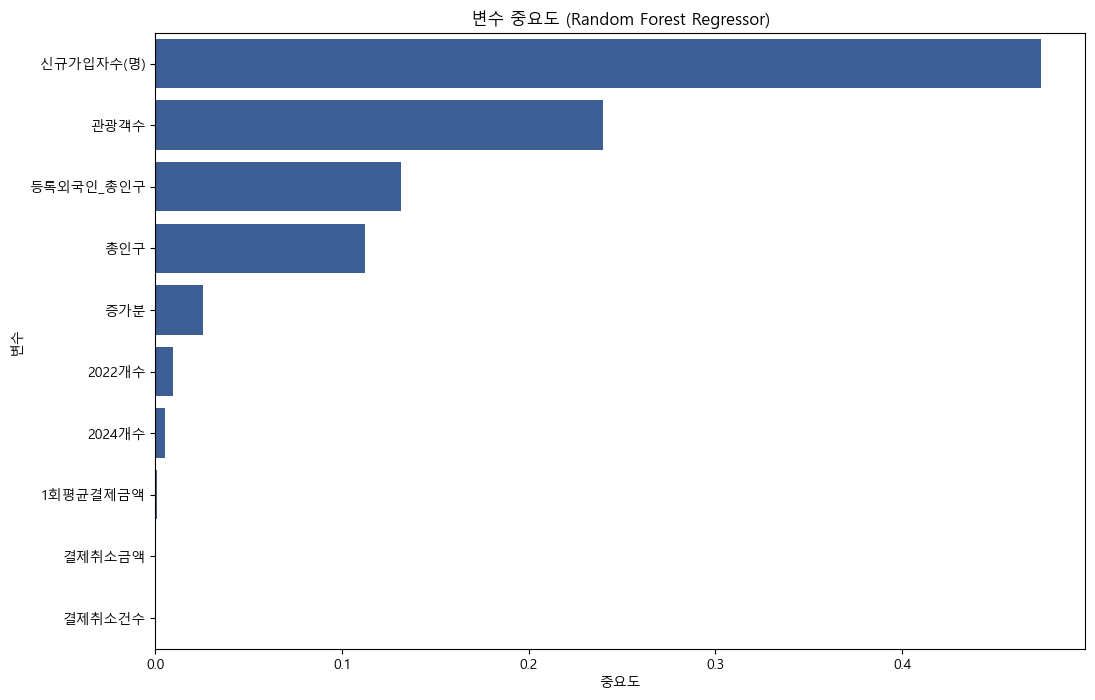

    Variable  Importance
6  신규가입자수(명)    0.474443
5       관광객수    0.239718
4  등록외국인_총인구    0.131818
3        총인구    0.112423
9        증가분    0.025403
8     2022개수    0.009664
7     2024개수    0.005161
2   1회평균결제금액    0.000843
1     결제취소금액    0.000389
0     결제취소건수    0.000139


In [887]:
# 문자열 변수만 선택
str_columns = df1.select_dtypes(include=['object']).columns
print("문자열 변수:", str_columns)

# 제외할 열 리스트
exclude_columns = str_columns.tolist() + ['기준연도'] + ['결제금액'] + ['결제건수'] + ['총인구_남'] + ['총인구_여'] + ['내국인_세대수'] + ['내국인_총인구'] + ['내국인_남'] + ['내국인_여'] + ['등록외국인_남'] + ['등록외국인_여'] + ['월별충전액(만원)'] 

# 문자열 변수 및 기준연도 변수를 제외한 데이터프레임
X = df1.drop(columns=exclude_columns)

# 종속 변수 설정
target_variable = '경기도 총결제금액(연도별)'

# 종속 변수를 포함한 데이터프레임에서 종속 변수와 독립 변수 분리
if target_variable not in X.columns:
    raise ValueError(f"종속 변수 '{target_variable}'가 데이터프레임에 존재하지 않습니다.")

y = df1[target_variable]
X = X.drop(columns=[target_variable])  # 종속변수로 사용한 열 제거

# 데이터 확인: 결측값 처리 후 데이터가 비어 있는지 확인
print(X.shape)  # 데이터의 행과 열 확인

if X.shape[0] == 0:
    raise ValueError("데이터에 유효한 샘플이 없습니다. 결측값 처리를 검토하십시오.")

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 변수 중요도 추출
importance = model.feature_importances_

# 변수 중요도 데이터프레임 생성
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(12, 8))
color = '#2E5BA3' 
sns.barplot(x='Importance', y='Variable', data=importance_df, palette=[color])
plt.title('변수 중요도 (Random Forest Regressor)')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()

# 중요도 출력
print(importance_df)

2. GradientBoostingRegressor

문자열 변수: Index(['시군명', '연령대', '성별'], dtype='object')
(1298, 10)


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2835229612.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=importance_df, palette=[color])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2835229612.py:41: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Importance', y='Variable', data=importance_df, palette=[color])


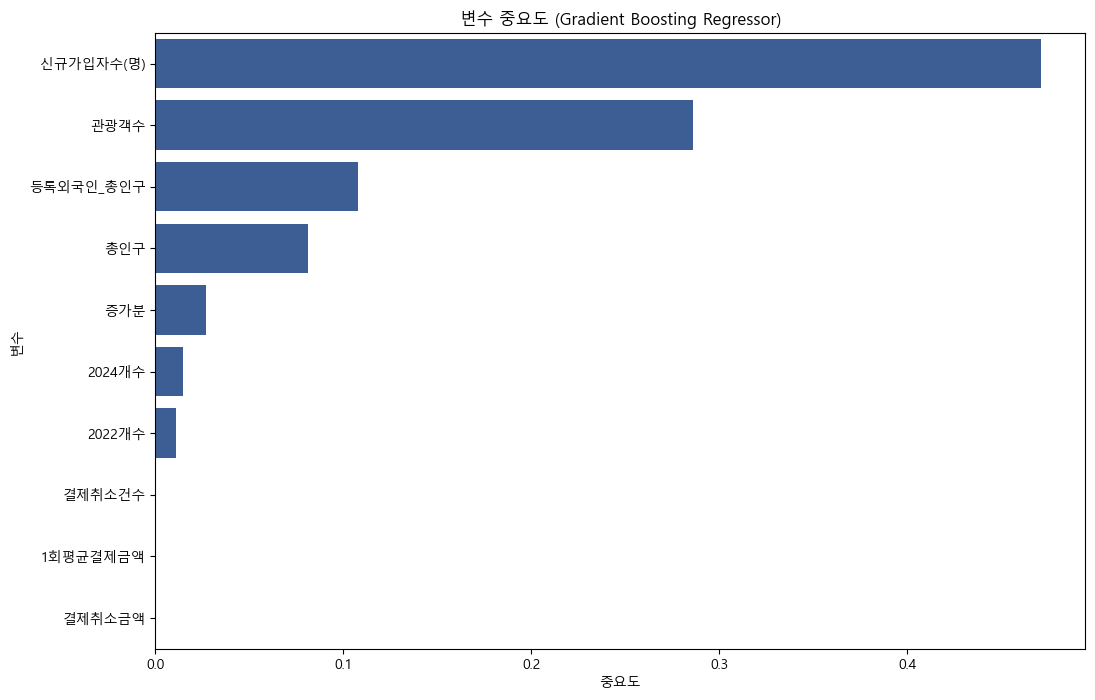

    Variable  Importance
6  신규가입자수(명)    0.471257
5       관광객수    0.286194
4  등록외국인_총인구    0.107983
3        총인구    0.081350
9        증가분    0.026829
7     2024개수    0.014735
8     2022개수    0.011087
0     결제취소건수    0.000486
2   1회평균결제금액    0.000079
1     결제취소금액    0.000001


In [888]:
# 문자열 변수만 선택
str_columns = df1.select_dtypes(include=['object']).columns
print("문자열 변수:", str_columns)

# 제외할 열 리스트
exclude_columns = str_columns.tolist() + ['기준연도'] + ['결제금액'] + ['결제건수'] + ['총인구_남'] + ['총인구_여'] + ['내국인_세대수'] + ['내국인_총인구'] + ['내국인_남'] + ['내국인_여'] + ['등록외국인_남'] + ['등록외국인_여'] + ['월별충전액(만원)'] 

# 문자열 변수 및 기준연도 변수를 제외한 데이터프레임
X = df1.drop(columns=exclude_columns)

# 종속 변수 설정
target_variable = '경기도 총결제금액(연도별)'

# 종속 변수를 포함한 데이터프레임에서 종속 변수와 독립 변수 분리
if target_variable not in X.columns:
    raise ValueError(f"종속 변수 '{target_variable}'가 데이터프레임에 존재하지 않습니다.")

y = df1[target_variable]
X = X.drop(columns=[target_variable])  # 종속변수로 사용한 열 제거

# 데이터 확인: 결측값 처리 후 데이터가 비어 있는지 확인
print(X.shape)  # 데이터의 행과 열 확인

if X.shape[0] == 0:
    raise ValueError("데이터에 유효한 샘플이 없습니다. 결측값 처리를 검토하십시오.")

# Gradient Boosting Regressor 모델 학습
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 변수 중요도 추출
importance = model.feature_importances_

# 변수 중요도 데이터프레임 생성
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(12, 8))
color = '#2E5BA3' 
sns.barplot(x='Importance', y='Variable', data=importance_df, palette=[color])
plt.title('변수 중요도 (Gradient Boosting Regressor)')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()

# 중요도 출력
print(importance_df)

<hr>

<h3> [군집화를 위한 데이터 정리] <h3>

In [889]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [890]:
df1.dtypes

기준연도                int64
시군명                object
연령대                object
성별                 object
결제건수                int64
결제금액              float64
결제취소건수            float64
결제취소금액            float64
1회평균결제금액          float64
총인구               float64
총인구_남             float64
총인구_여             float64
내국인_세대수           float64
내국인_총인구           float64
내국인_남             float64
내국인_여             float64
등록외국인_총인구         float64
등록외국인_남           float64
등록외국인_여           float64
관광객수              float64
경기도 총결제금액(연도별)    float64
신규가입자수(명)         float64
월별충전액(만원)         float64
2024개수              int64
2022개수              int64
증가분                 int64
dtype: object

In [891]:
# 인구통계 데이터를 이용한 파생변수 추가

# 빈 데이터프레임 생성
result_dfs = []

# 각 연도별로 반복
for year in [2023, 2022, 2021]:
    # 연도별 데이터 필터링
    year_df = df1[df1['기준연도'] == year]
    
    # 시군명 별로 데이터 그룹화
    grouped_df = year_df.groupby('시군명').agg({
        '결제건수': 'sum',
        '결제금액': 'sum',
        '결제취소건수' : 'sum',
        '결제취소금액' : 'sum',
        '총인구': 'mean',  # 총인구는 평균을 사용하여 시군별로 인구를 대체
        '등록외국인_총인구': 'mean',
        '관광객수' : 'mean',
        '신규가입자수(명)': 'mean'
    }).reset_index()

    # 외국인 비율 계산
    grouped_df['외국인 비율'] = grouped_df['등록외국인_총인구'] / grouped_df['총인구']
    
    # 관광객 비율 계산
    grouped_df['관광객 비율'] = grouped_df['관광객수'] / grouped_df['총인구']

    # 인구 대비 관광객 수 계산
    grouped_df['인구 대비 관광객 수'] = grouped_df['관광객수'] / (grouped_df['총인구'] + grouped_df['관광객수'])

    # 컬럼 이름 변경
    grouped_df = grouped_df.rename(columns={
        '결제건수': '총결제건수(연도별)',
        '결제금액': '총결제금액(연도별)',
        '결제취소건수' : '총결제취소건수(연도별)',
        '결제취소금액' : '총결제취소금액(연도별)'
    })

    # 결제건수 비율과 결제금액 비율 계산
    grouped_df['결제건수 비율'] = grouped_df['총결제건수(연도별)'] / grouped_df['총인구']
    grouped_df['결제금액 비율'] = grouped_df['총결제금액(연도별)'] / grouped_df['총인구']

    # 결제취소건수 비율과 결제취소금액 비율 계산
    grouped_df['결제취소건수 비율'] = grouped_df['총결제취소건수(연도별)'] / grouped_df['총인구']
    grouped_df['결제취소금액 비율'] = grouped_df['총결제취소금액(연도별)'] / grouped_df['총인구']

    # 신규가입자수 비율 계산
    grouped_df['신규가입자수 비율'] = grouped_df['신규가입자수(명)'] / grouped_df['총인구']

    # 연도 컬럼 추가
    grouped_df['기준연도'] = year
    
    # 결과 데이터프레임에 추가
    result_dfs.append(grouped_df)

# 모든 연도 데이터프레임 통합
final_df = pd.concat(result_dfs)

final_df

,시군명,총결제건수(연도별),총결제금액(연도별),총결제취소건수(연도별),총결제취소금액(연도별),총인구,등록외국인_총인구,관광객수,신규가입자수(명),외국인 비율,관광객 비율,인구 대비 관광객 수,결제건수 비율,결제금액 비율,결제취소건수 비율,결제취소금액 비율,신규가입자수 비율,기준연도
0,가평군,1453718,"3,774,609.88","15,343.00","85,634.55","63,488.00","1,186.00","26,926,952.00","10,557.00",0.02,424.13,1.00,22.90,59.45,0.24,1.35,0.17,2023
1,고양시,6885890,"13,860,678.98","42,312.00","134,395.96","1,087,607.00","12,700.00","167,874,170.00","45,931.00",0.01,154.35,0.99,6.33,12.74,0.04,0.12,0.04,2023
2,과천시,1825774,"3,951,783.29","11,960.00","45,514.34","81,219.00",219.00,"20,476,628.00","8,579.00",0.00,252.12,1.00,22.48,48.66,0.15,0.56,0.11,2023
3,광명시,5959843,"14,699,869.58","44,758.00","277,752.07","283,124.00","2,927.00","40,908,151.00","61,939.00",0.01,144.49,0.99,21.05,51.92,0.16,0.98,0.22,2023
4,광주시,7775989,"19,407,576.76","80,774.00","491,951.30","404,270.00","12,893.00","46,240,850.00","22,055.00",0.03,114.38,0.99,19.23,48.01,0.20,1.22,0.05,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,의왕시,2453973,"5,012,366.05","21,401.00","96,355.58","164,363.00","1,007.00","25,917,420.00","44,749.00",0.01,157.68,0.99,14.93,30.50,0.13,0.59,0.27,2021
15,의정부시,6133934,"12,264,379.93","44,036.00","158,088.87","468,339.00","4,678.00","38,987,138.00","95,127.00",0.01,83.25,0.99,13.10,26.19,0.09,0.34,0.20,2021
16,파주시,7099954,"16,581,704.95","62,260.00","254,362.58","493,503.00","10,258.00","50,951,894.00","109,795.00",0.02,103.25,0.99,14.39,33.60,0.13,0.52,0.22,2021
17,포천시,2074278,"5,156,087.87","18,998.00","91,553.12","160,209.00","11,270.00","28,452,691.00","47,737.00",0.07,177.60,0.99,12.95,32.18,0.12,0.57,0.30,2021


In [892]:
# df1과 final_df를 '시군명'과 '기준연도'를 기준으로 병합
df1 = pd.merge(df1, final_df[['시군명', '기준연도', '총결제건수(연도별)', '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율', '관광객 비율', '인구 대비 관광객 수', '결제취소건수 비율', '결제취소금액 비율', '신규가입자수 비율']], on=['시군명', '기준연도'], how='left')
pd.set_option('display.max_columns', None)
df1

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,관광객수,경기도 총결제금액(연도별),신규가입자수(명),월별충전액(만원),2024개수,2022개수,증가분,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율,신규가입자수 비율
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18


In [893]:
# 결측치 확인
print(df1.isna())            # 각 위치에 NaN이 있는지 확인
print(df1.isna().sum())      # 각 열에 NaN의 개수 확인
print(df1.isna().sum().sum())# 전체 데이터프레임에서 NaN의 총 개수 확인

       기준연도    시군명    연령대     성별   결제건수   결제금액  결제취소건수  결제취소금액  1회평균결제금액  \
0     False  False  False  False  False  False   False   False     False   
1     False  False  False  False  False  False   False   False     False   
2     False  False  False  False  False  False   False   False     False   
3     False  False  False  False  False  False   False   False     False   
4     False  False  False  False  False  False   False   False     False   
...     ...    ...    ...    ...    ...    ...     ...     ...       ...   
1293  False  False  False  False  False  False   False   False     False   
1294  False  False  False  False  False  False   False   False     False   
1295  False  False  False  False  False  False   False   False     False   
1296  False  False  False  False  False  False   False   False     False   
1297  False  False  False  False  False  False   False   False     False   

        총인구  총인구_남  총인구_여  내국인_세대수  내국인_총인구  내국인_남  내국인_여  등록외국인_총인구  등록외국인_남  \
0     

In [894]:
df1.to_csv('병합.csv',index=False)

In [895]:
# df1을 시군명 단위로 집계 
# aggregated_data = df1.groupby('시군명').agg({
#     '결제건수': 'sum',
#     '결제금액': 'sum',
#     '결제취소건수' : 'sum',
#     '결제취소금액' : 'sum',
#     '1회평균결제금액': 'mean',
#     '총인구': 'mean',
#     '총인구_남': 'mean',
#     '총인구_여': 'mean',
#     '내국인_세대수': 'mean',
#     '내국인_총인구': 'mean',
#     '내국인_남': 'mean',
#     '내국인_여': 'mean',
#     '등록외국인_총인구': 'mean',
#     '등록외국인_남': 'mean',
#     '등록외국인_여': 'mean',
#     '관광객수': 'mean',
#     '총결제건수(연도별)': 'sum',
#     '총결제금액(연도별)': 'sum',
#     '외국인 비율': 'mean',
#     '결제건수 비율': 'mean',
#     '결제금액 비율': 'mean',
#     '관광객 비율': 'mean',
#     '인구 대비 관광객 수': 'mean',
#     '결제취소건수 비율' : 'mean', 
#     '결제취소금액 비율' : 'mean',
#     '2024개수': 'mean',
#     '2022개수' : 'mean',
#     '증가분' : 'mean',
#     '신규가입자수 비율' : 'mean'
# }).reset_index()

In [896]:
# 시군명 단위로 집계 (위의 주석 처리 중 유의미한 것만 선택)
aggregated_data = df1.groupby('시군명').agg({
    '결제건수': 'sum',
    '결제금액': 'sum',
    '총인구': 'mean',
    '외국인 비율': 'mean',
    '결제건수 비율': 'mean',
    '결제금액 비율': 'mean',
    '관광객 비율': 'mean',
    '2024개수': 'mean',
    '2022개수' : 'mean',
    '증가분' : 'mean',
    '신규가입자수 비율' : 'mean'
}).reset_index()

aggregated_data

,시군명,결제건수,결제금액,총인구,외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,2024개수,2022개수,증가분,신규가입자수 비율
0,가평군,2828907,"7,258,474.04","63,361.50",0.02,22.32,57.27,441.59,"3,354.00","3,553.00",-199.00,0.15
1,고양시,18627130,"37,926,045.64","1,087,880.00",0.01,8.56,17.43,108.34,"26,672.00","27,042.00",-370.00,0.05
2,과천시,5781679,"12,556,369.47","77,692.00",0.00,24.83,53.93,249.10,"2,032.00","1,469.00",563.00,0.24
3,광명시,16375894,"40,245,599.01","290,251.67",0.01,18.83,46.30,134.25,"10,594.00","8,745.00","1,849.00",0.18
4,광주시,28224807,"69,045,805.68","401,753.00",0.03,23.43,57.30,116.22,"11,204.00","11,974.00",-770.00,0.17
5,구리시,11311464,"28,538,813.44","190,731.67",0.01,19.78,49.92,235.07,"6,281.00","6,751.00",-470.00,0.18
6,군포시,14863136,"31,019,829.02","269,377.00",0.02,27.55,57.48,96.26,"7,370.00","8,348.00",-978.00,0.09
7,김포시,15449433,"50,529,938.71","506,453.50",0.04,15.28,49.97,101.09,"14,833.00","15,668.00",-835.00,0.08
8,남양주시,19045416,"52,255,188.02","742,948.00",0.01,12.82,35.16,98.06,"20,531.00","20,709.00",-178.00,0.07
9,동두천시,3451815,"8,378,959.17","94,791.33",0.04,12.12,29.45,98.25,"3,308.00","3,554.00",-246.00,0.12


<hr>

<h3>[군집화]</h3>

c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


각 군집에 속한 시군명:
Cluster 0: 고양시, 김포시, 남양주시, 부천시, 성남시, 시흥시, 안산시, 안양시, 의정부시, 파주시, 평택시
Cluster 1: 가평군, 과천시, 광명시, 광주시, 구리시, 군포시, 양평군, 이천시, 하남시
Cluster 2: 동두천시, 안성시, 양주시, 여주시, 연천군, 오산시, 의왕시, 포천시
Cluster 3: 수원시, 용인시, 화성시


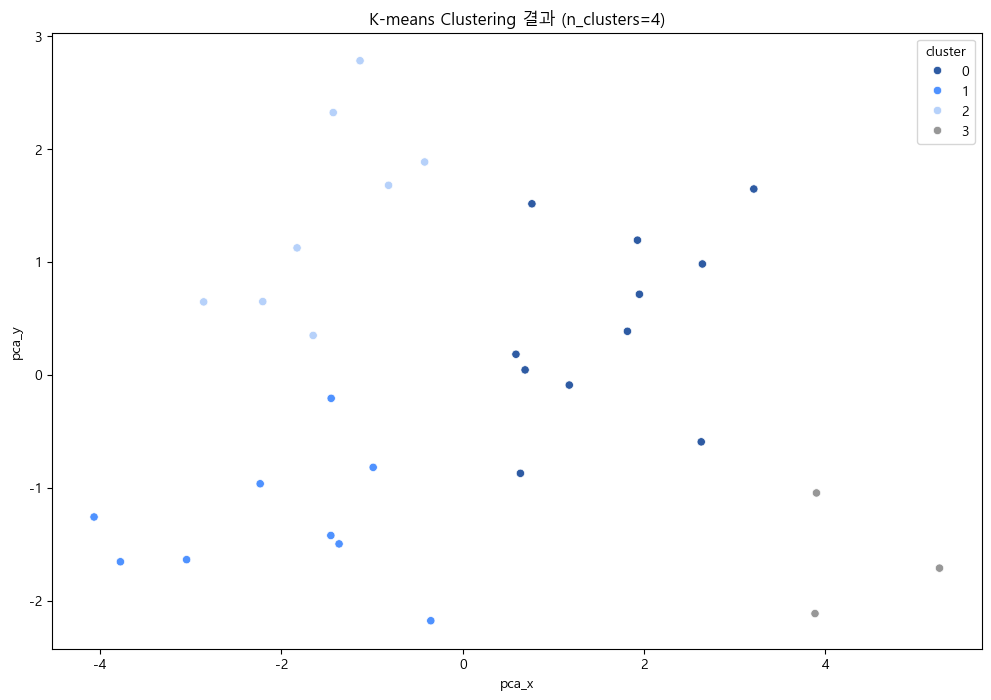

전체 실루엣 계수: 0.21
Cluster 0의 평균 실루엣 계수: 0.08
Cluster 1의 평균 실루엣 계수: 0.21
Cluster 2의 평균 실루엣 계수: 0.27
Cluster 3의 평균 실루엣 계수: 0.52


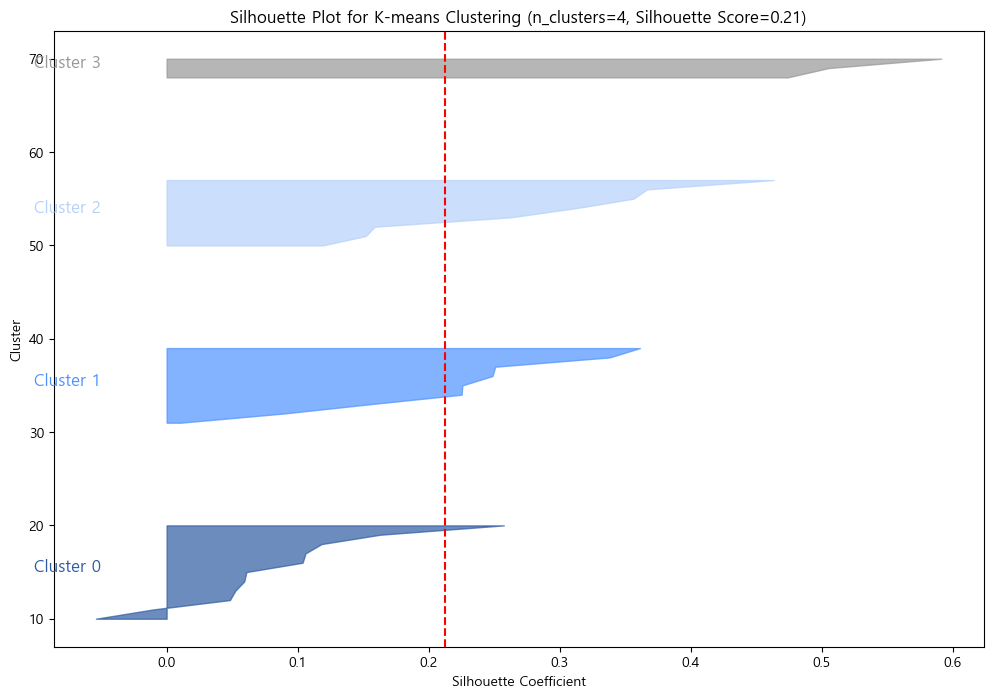

In [897]:
# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(aggregated_data.drop(columns='시군명'))

# 군집 개수 설정
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# 데이터에 군집 결과 추가
aggregated_data['cluster'] = clusters

# 각 군집에 속한 시군명을 집계
cluster_groups = aggregated_data.groupby('cluster')['시군명'].apply(list)

# 군집별로 시군명을 출력
print("각 군집에 속한 시군명:")
for cluster, cities in cluster_groups.items():
    print(f"Cluster {cluster}: {', '.join(cities)}")

# PCA를 통한 시각화
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
aggregated_data['pca_x'] = principal_components[:, 0]
aggregated_data['pca_y'] = principal_components[:, 1]

# 원하는 색상 팔레트
cluster_colors = ['#2E5BA3', '#4F92FF', '#B6D1FA', '#979797']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=aggregated_data, palette=cluster_colors)
plt.title(f'K-means Clustering 결과 (n_clusters={n_clusters})')
plt.show()

# 실루엣 계수 계산
silhouette_vals = silhouette_samples(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)

# 실루엣 계수 출력
print(f'전체 실루엣 계수: {silhouette_avg:.2f}')
for cluster in range(n_clusters):
    cluster_silhouette_avg = silhouette_vals[clusters == cluster].mean()
    print(f'Cluster {cluster}의 평균 실루엣 계수: {cluster_silhouette_avg:.2f}')

# 군집별 실루엣 계수 플롯
fig, ax = plt.subplots(figsize=(12, 8))
y_lower = 10
for cluster in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    
    size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size
    color = sns.color_palette(cluster_colors, n_colors=n_clusters)[cluster]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {cluster}', va='center', ha='right', color=color, fontsize=12)
    y_lower = y_upper + 10

ax.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title(f'Silhouette Plot for K-means Clustering (n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.2f})')
plt.show()

-> 군집 수가 2일때 실루엣 계수가 가장 높지만, 데이터 분포를 고려하여 군집 수를 4로 결정함.

In [898]:
aggregated_data.to_csv('군집화.csv',index=False)

In [899]:
# df1과 aggregated_data를 '시군명'을 기준으로 병합
df4 = pd.merge(df1, aggregated_data[['시군명', 'cluster', 'pca_x', 'pca_y']], on=['시군명'], how='left')
df4

,기준연도,시군명,연령대,성별,결제건수,결제금액,결제취소건수,결제취소금액,1회평균결제금액,총인구,총인구_남,총인구_여,내국인_세대수,내국인_총인구,내국인_남,내국인_여,등록외국인_총인구,등록외국인_남,등록외국인_여,관광객수,경기도 총결제금액(연도별),신규가입자수(명),월별충전액(만원),2024개수,2022개수,증가분,총결제건수(연도별),총결제금액(연도별),외국인 비율,결제건수 비율,결제금액 비율,관광객 비율,인구 대비 관광객 수,결제취소건수 비율,결제취소금액 비율,신규가입자수 비율,cluster,pca_x,pca_y
0,2023,가평군,10대,남,8409,"18,884.51",46.00,487.18,2.25,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17,1,-4.07,-1.26
1,2023,가평군,10대,여,6584,"17,660.54",68.00,184.14,2.68,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17,1,-4.07,-1.26
2,2023,가평군,20대,남,70363,"154,501.83",728.00,"3,756.00",2.20,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17,1,-4.07,-1.26
3,2023,가평군,20대,여,55118,"133,250.66",681.00,"2,799.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17,1,-4.07,-1.26
4,2023,가평군,30대,남,110968,"268,223.50","1,382.00","8,447.63",2.42,"63,488.00","32,650.00","30,838.00","32,606.00","62,302.00","32,137.00","30,165.00","1,186.00",513.00,673.00,"26,926,952.00","464,996,076.10","10,557.00","4,182,600.00",3354,3553,-199,1453718,"3,774,609.88",0.02,22.90,59.45,424.13,1.00,0.24,1.35,0.17,1,-4.07,-1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2021,화성시,60대,여,392006,"872,926.29","3,950.00","14,035.35",2.23,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18,3,3.89,-2.12
1294,2021,화성시,70대,남,93924,"201,672.86",878.00,"3,674.47",2.15,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18,3,3.89,-2.12
1295,2021,화성시,70대,여,94936,"211,313.70",948.00,"3,108.21",2.23,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18,3,3.89,-2.12
1296,2021,화성시,80대 이상,남,14820,"29,606.31",128.00,342.42,2.00,"922,092.00","485,329.00","436,763.00","372,888.00","887,015.00","460,788.00","426,227.00","35,077.00","24,541.00","10,536.00","90,629,181.00","296,903,279.88","167,965.00","33,758,061.00",27663,26308,1355,17790643,"41,536,194.92",0.04,19.29,45.05,98.29,0.99,0.16,0.67,0.18,3,3.89,-2.12


In [900]:
df4.to_csv('분석용_df1.csv',index=False)

In [901]:
# df4 데이터프레임의 열 이름들만 출력
df4.columns

Index(['기준연도', '시군명', '연령대', '성별', '결제건수', '결제금액', '결제취소건수', '결제취소금액',
       '1회평균결제금액', '총인구', '총인구_남', '총인구_여', '내국인_세대수', '내국인_총인구', '내국인_남',
       '내국인_여', '등록외국인_총인구', '등록외국인_남', '등록외국인_여', '관광객수', '경기도 총결제금액(연도별)',
       '신규가입자수(명)', '월별충전액(만원)', '2024개수', '2022개수', '증가분', '총결제건수(연도별)',
       '총결제금액(연도별)', '외국인 비율', '결제건수 비율', '결제금액 비율', '관광객 비율', '인구 대비 관광객 수',
       '결제취소건수 비율', '결제취소금액 비율', '신규가입자수 비율', 'cluster', 'pca_x', 'pca_y'],
      dtype='object')

<hr>

<h3>[군집별 특징 - df4]</h3>

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2944999162.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=cluster_data, palette=cluster_colors, ax=ax, orient='h')
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2944999162.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=cluster_data, palette=cluster_colors, ax=ax, orient='h')
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2944999162.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=clus

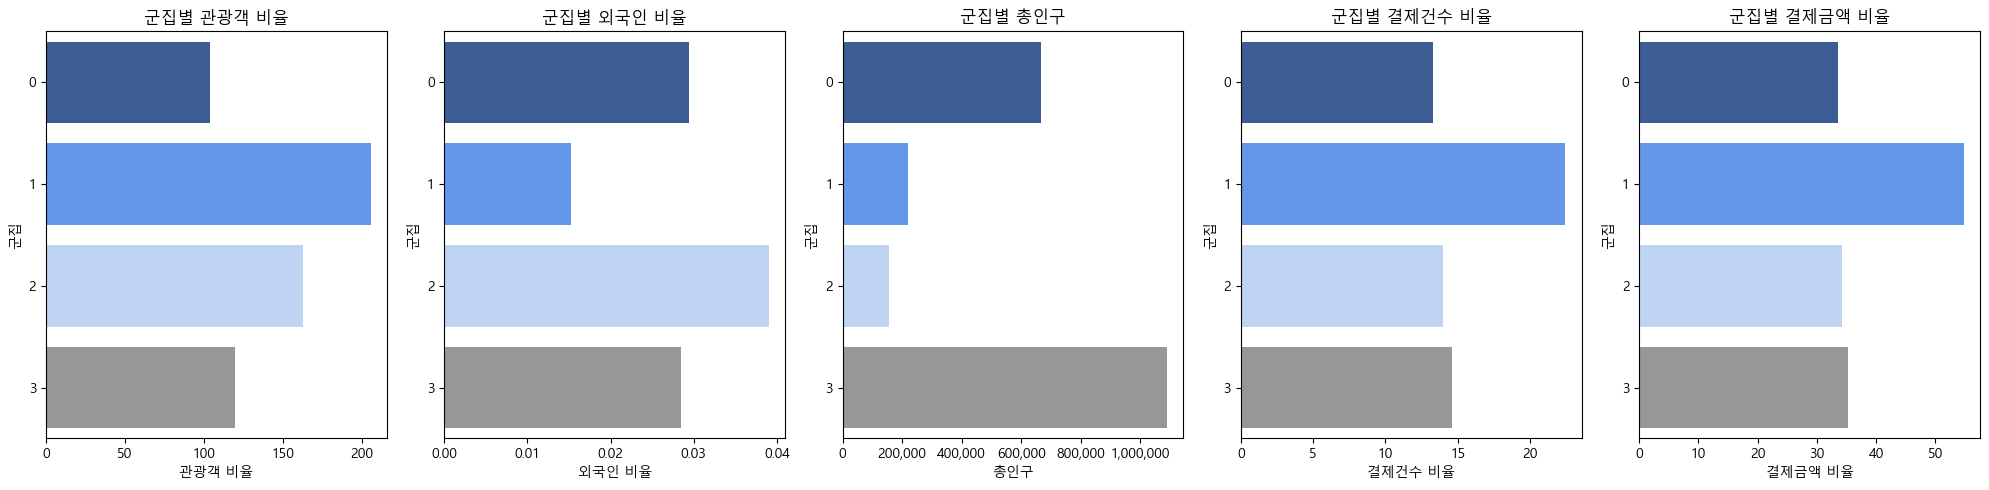

In [902]:
# 시각화할 데이터와 플롯의 개수 (원하는 5개 항목만 선택)
plot_titles = ['관광객 비율', '외국인 비율', '총인구', '결제건수 비율', '결제금액 비율']

# 지수 표기를 원하지 않는 항목
no_exponential_titles = ['총인구']

# 서브플롯 개수 설정
num_plots = len(plot_titles)

# 서브플롯 배열의 행과 열 개수 설정 (1행 5열로 설정)
ncols = num_plots
nrows = 1

# 서브플롯 생성
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5))
axs = axs.flatten()  # axs를 1D 배열로 평탄화

# 서브플롯 데이터와 그래프 그리기
for i, title in enumerate(plot_titles):
    ax = axs[i]
    
    # 군집별로 해당 데이터의 평균을 계산
    cluster_data = df4.groupby('cluster')[title].mean().reset_index()
    
    # 가로 막대 그래프 시각화
    sns.barplot(x=title, y='cluster', data=cluster_data, palette=cluster_colors, ax=ax, orient='h')
    ax.set_title(f'군집별 {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('군집')
    
    # 축의 형식 조정
    if title in no_exponential_titles:
        # 지수 표기 방지
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  
    else:
        # 기본 형식으로 표시
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter()) 

# 레이아웃 조정
plt.tight_layout()
plt.show()

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2159177022.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=cluster_data, palette=cluster_colors, ax=ax, orient='h')
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2159177022.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=cluster_data, palette=cluster_colors, ax=ax, orient='h')
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_12536\2159177022.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title, y='cluster', data=clus

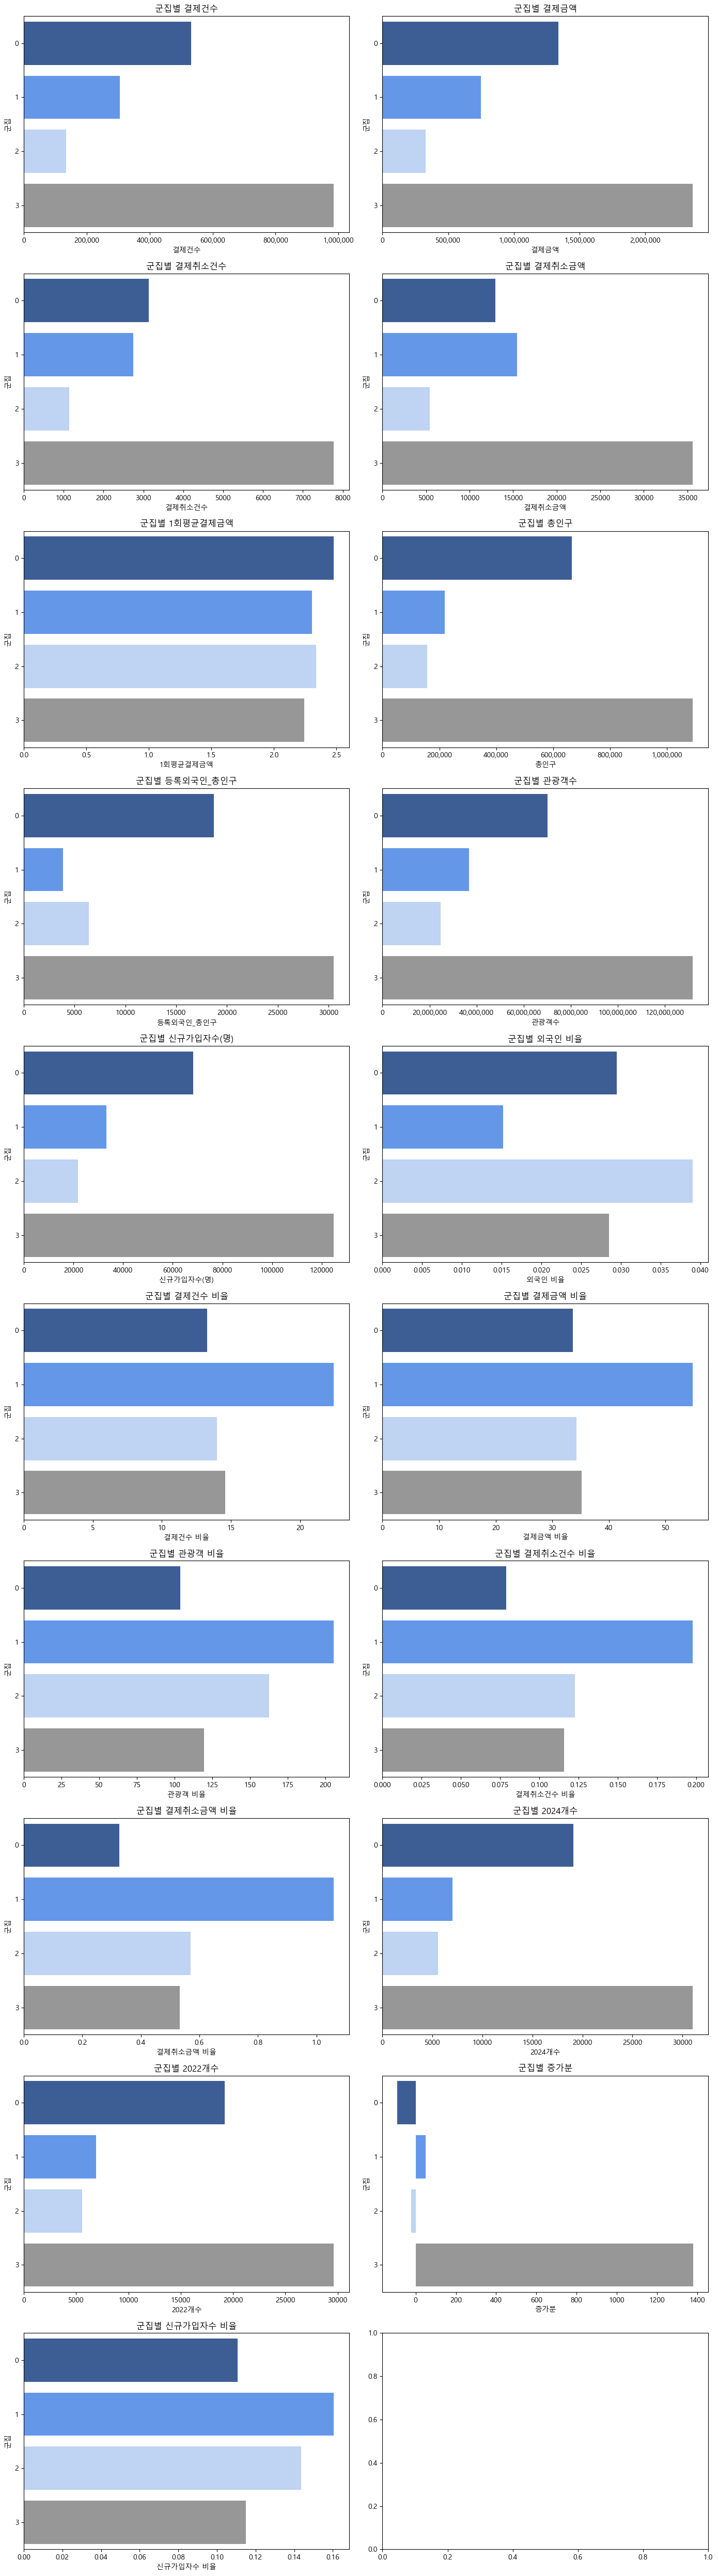

In [903]:
# 시각화할 데이터와 플롯의 개수
plot_titles = [
    '결제건수', '결제금액', '결제취소건수', '결제취소금액', '1회평균결제금액',
    '총인구', '등록외국인_총인구', '관광객수', '신규가입자수(명)', '외국인 비율',
    '결제건수 비율', '결제금액 비율', '관광객 비율', '결제취소건수 비율',
    '결제취소금액 비율', '2024개수', '2022개수', '증가분', '신규가입자수 비율'
]

# 지수 표기를 원하지 않는 항목
no_exponential_titles = [
    '결제건수', '결제금액', '총인구', '관광객수'
]

# 서브플롯 개수 설정
num_plots = len(plot_titles)

# 서브플롯 배열의 행과 열 개수 설정
ncols = 2  # 2열로 설정
nrows = (num_plots + ncols - 1) // ncols  # 행 개수 계산

# 서브플롯 생성
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))
axs = axs.flatten()  # axs를 1D 배열로 평탄화

# 서브플롯 데이터와 그래프 그리기
for i, title in enumerate(plot_titles):
    if i >= len(axs):  # 서브플롯이 부족할 경우
        break
    ax = axs[i]
    
    # 군집별로 해당 데이터의 평균을 계산
    cluster_data = df4.groupby('cluster')[title].mean().reset_index()
    
    # 가로 막대 그래프 시각화
    sns.barplot(x=title, y='cluster', data=cluster_data, palette=cluster_colors, ax=ax, orient='h')
    ax.set_title(f'군집별 {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('군집')
    
    # 축의 형식 조정
    if title in no_exponential_titles:
        # 지수 표기 방지
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  
    else:
        # 기본 형식으로표시
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter()) 

# 레이아웃 조정
plt.tight_layout()
plt.show()

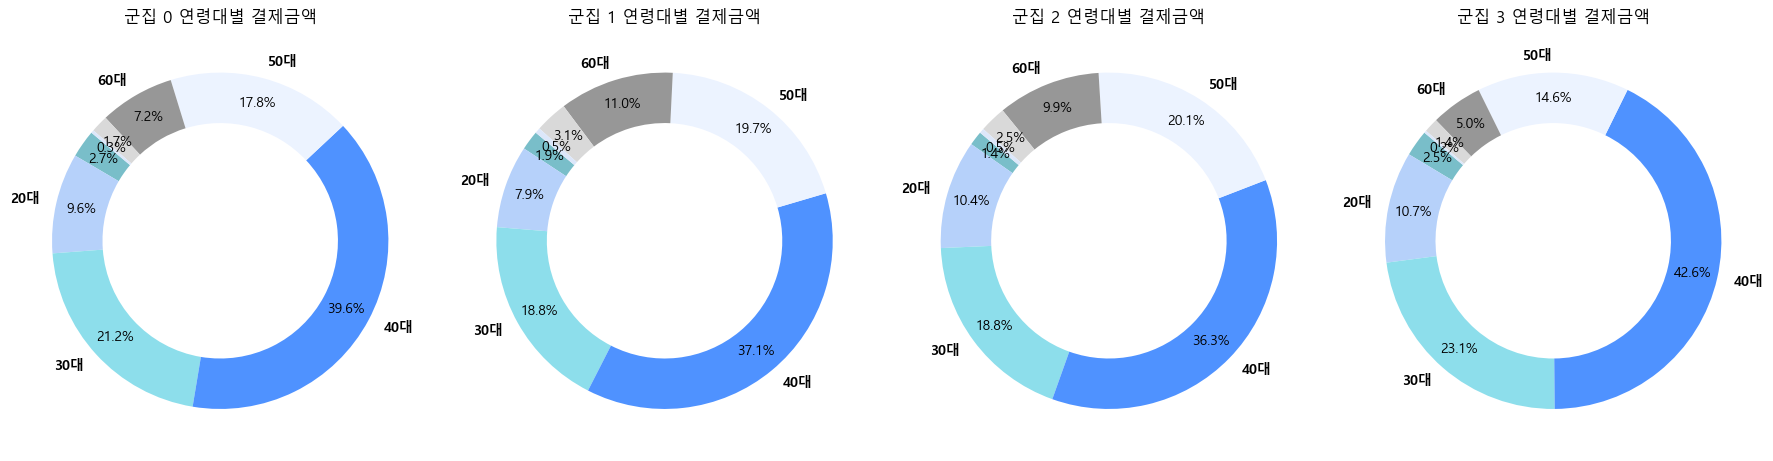

In [904]:
# 원하는 색상 팔레트
cluster_colors2 = ['#79BEC9', '#B6D1FA', '#8DDEEB', '#4F92FF', '#ECF3FF', '#979797', '#D9D9D9', '#DCE7FA']

# 군집별 연령대별 결제금액 평균 계산
cluster_age_avg = df4.groupby(['cluster', '연령대'])[['결제금액']].mean().reset_index()

# 군집별 총 결제금액 평균 계산
cluster_avg_total = df4.groupby('cluster')[['결제금액']].mean().reset_index()
cluster_avg_total.rename(columns={'결제금액': '총결제금액 평균'}, inplace=True)

# 군집별 연령대 비율 계산
cluster_age_avg = pd.merge(cluster_age_avg, cluster_avg_total, on='cluster')
cluster_age_avg['결제금액 비율'] = cluster_age_avg['결제금액'] / cluster_age_avg['총결제금액 평균'] * 100

# 군집 리스트
clusters = cluster_age_avg['cluster'].unique()

# 색상 팔레트 정의
#palette = sns.color_palette("Set3", len(cluster_age_avg['연령대'].unique()))

# 도넛 차트 그리기
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(18, 8))

for i, cluster in enumerate(clusters):
    cluster_data = cluster_age_avg[cluster_age_avg['cluster'] == cluster]

    # 결제금액 비율이 낮은 3개 연령대 제외
    top_cluster_data = cluster_data.nlargest(len(cluster_data) - 3, '결제금액 비율')
    
    sizes = cluster_data['결제금액 비율']
    labels = cluster_data['연령대']
    colors = palette[:len(labels)]  # 각 군집의 연령대 수에 맞게 색상 선택

    # 하위 3개 연령대의 라벨을 빈 문자열로 설정
    label_list = [label if size in top_cluster_data['결제금액 비율'].values else '' for label, size in zip(labels, sizes)]

    wedges, texts, autotexts = axes[i].pie(
        sizes, labels=label_list, autopct='%1.1f%%', startangle=140,
        colors=cluster_colors2,  # 색상 지정
        wedgeprops=dict(width=0.3),
        pctdistance=0.85  # 퍼센트 텍스트의 위치 조정
    )
    
    # 레이블과 퍼센트 텍스트의 크기를 조절
    for text in texts:
        text.set_fontsize(10)
        text.set_fontweight('bold')
    for autotext in autotexts:
        autotext.set_fontsize(10)
    
    axes[i].set_title(f'군집 {cluster} 연령대별 결제금액')

plt.tight_layout()
plt.show()

<hr>

<h3>[군집별 특징 - df2]</h3>

In [905]:
# df2에서 군집 별로 특징을 보기 위해 데이터 병합 (시군명 기준)
df4_cluster = df4[['시군명', 'cluster']]
df4_cluster = df4_cluster.drop_duplicates()
df4_cluster

,시군명,cluster
0,가평군,1
32,고양시,0
64,과천시,1
112,광명시,1
160,광주시,1
208,구리시,1
256,군포시,1
288,김포시,0
320,남양주시,0
352,동두천시,2


In [906]:
df2 = pd.merge(df2, df4_cluster, on='시군명', how='inner')
df2

,시군명,기준년월,월별신규가입자수(명),월별충전액(만원),월별사용액(만원),cluster
0,가평군,2023-12,484.00,"405,100.00","214,000.00",1
1,가평군,2023-11,458.00,"236,800.00","218,700.00",1
2,가평군,2023-10,555.00,"259,600.00","233,500.00",1
3,가평군,2023-09,782.00,"311,300.00","237,600.00",1
4,가평군,2023-08,473.00,"363,100.00","239,200.00",1
...,...,...,...,...,...,...
1111,화성시,2021-05,"7,615.00","2,695,582.00","2,757,823.00",3
1112,화성시,2021-04,"23,662.00","2,789,792.00","2,789,886.00",3
1113,화성시,2021-03,"13,378.00","1,801,626.00","2,019,251.00",3
1114,화성시,2021-02,"23,305.00","1,801,626.00","2,019,251.00",3


In [907]:
df2.to_csv('분석용_df2.csv',index=False)

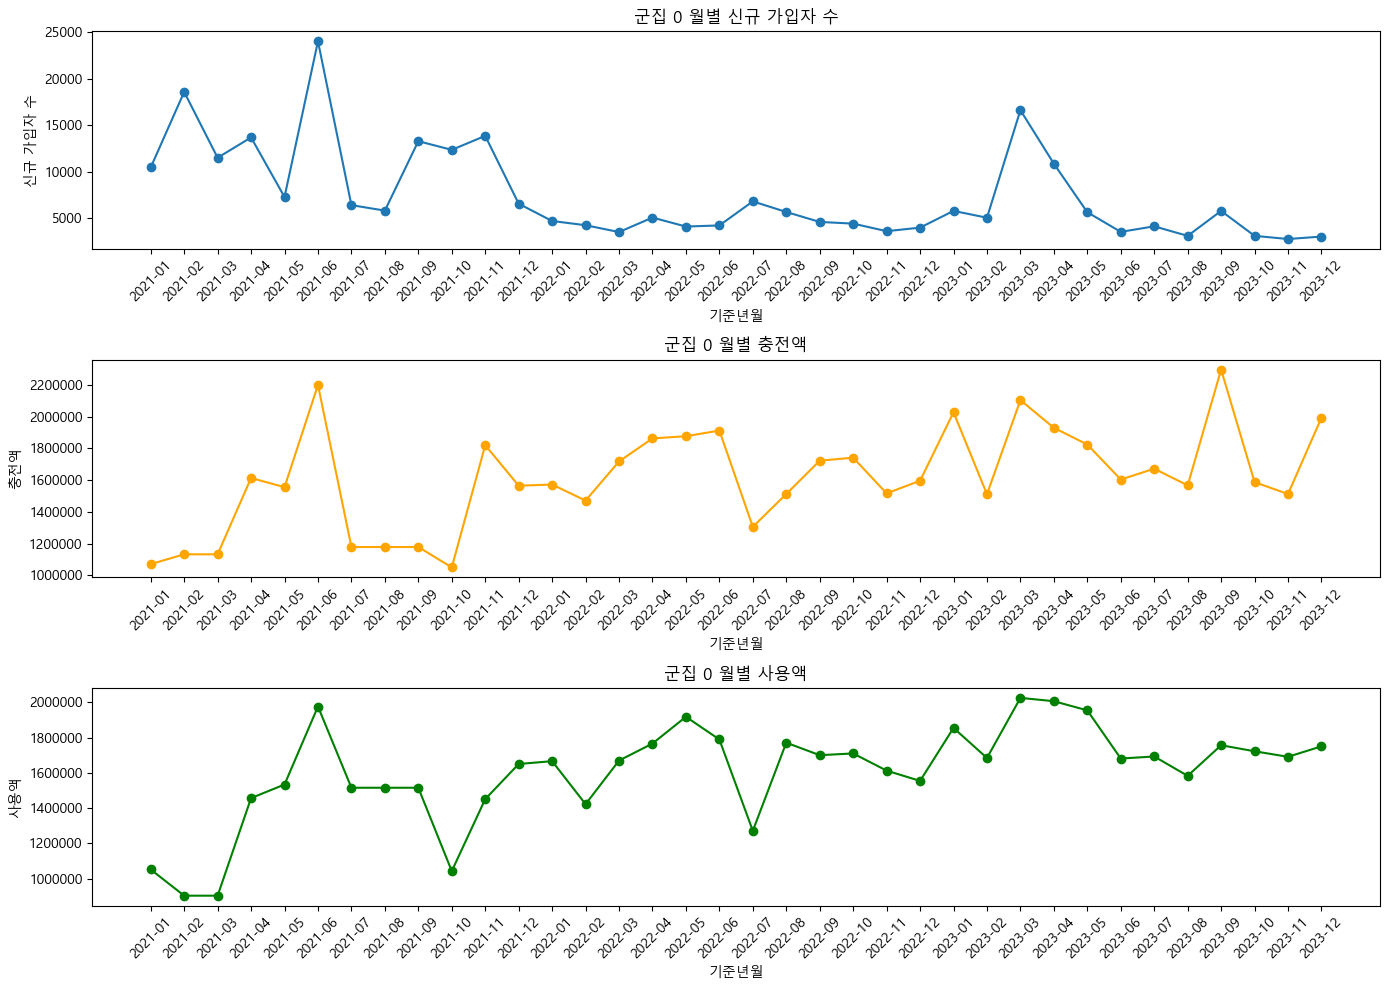

In [908]:
# 데이터 필터링: cluster 값에 따라 필터링
cluster_value = 0
df2_filtered = df2[df2['cluster'] == cluster_value]

# 월별 데이터의 평균값 계산
mean_values = df2_filtered.groupby('기준년월').agg({
    '월별신규가입자수(명)': 'mean',
    '월별충전액(만원)': 'mean',
    '월별사용액(만원)': 'mean'
}).reset_index()

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(mean_values['기준년월'], mean_values['월별신규가입자수(명)'], marker='o')
plt.title(f'군집 {cluster_value} 월별 신규 가입자 수') 
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(mean_values['기준년월'], mean_values['월별충전액(만원)'], marker='o', color='orange')
plt.title(f'군집 {cluster_value} 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(mean_values['기준년월'], mean_values['월별사용액(만원)'], marker='o', color='green')
plt.title(f'군집 {cluster_value} 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 레이아웃 조정
plt.tight_layout()
plt.show()

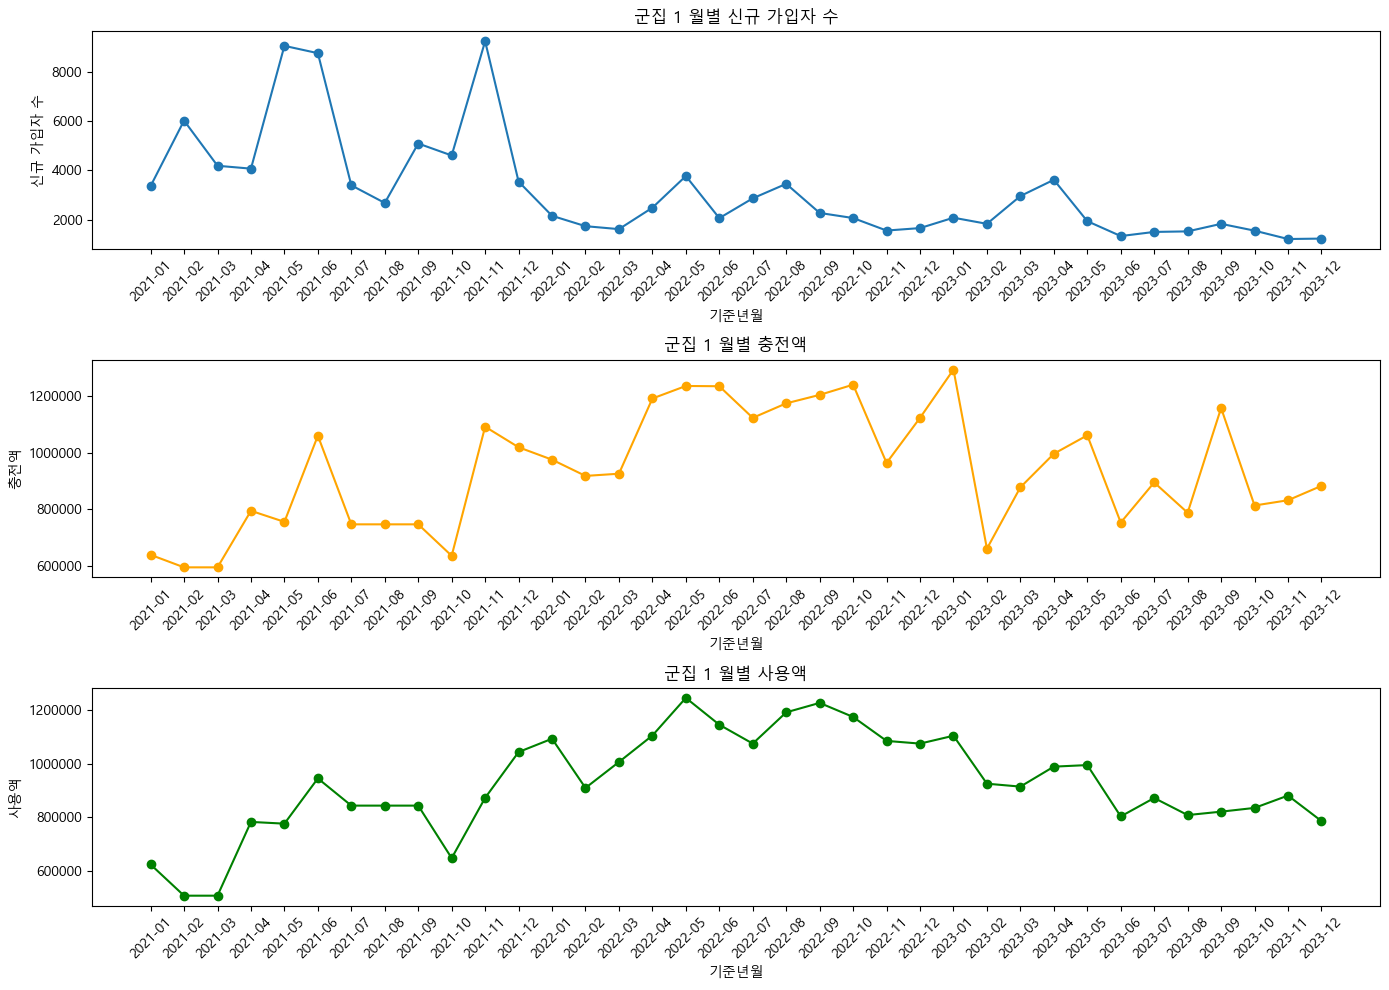

In [909]:
# 데이터 필터링: cluster 값에 따라 필터링
cluster_value = 1
df2_filtered = df2[df2['cluster'] == cluster_value]

# 월별 데이터의 평균값 계산
mean_values = df2_filtered.groupby('기준년월').agg({
    '월별신규가입자수(명)': 'mean',
    '월별충전액(만원)': 'mean',
    '월별사용액(만원)': 'mean'
}).reset_index()

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(mean_values['기준년월'], mean_values['월별신규가입자수(명)'], marker='o')
plt.title(f'군집 {cluster_value} 월별 신규 가입자 수') 
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(mean_values['기준년월'], mean_values['월별충전액(만원)'], marker='o', color='orange')
plt.title(f'군집 {cluster_value} 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(mean_values['기준년월'], mean_values['월별사용액(만원)'], marker='o', color='green')
plt.title(f'군집 {cluster_value} 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 레이아웃 조정
plt.tight_layout()
plt.show()

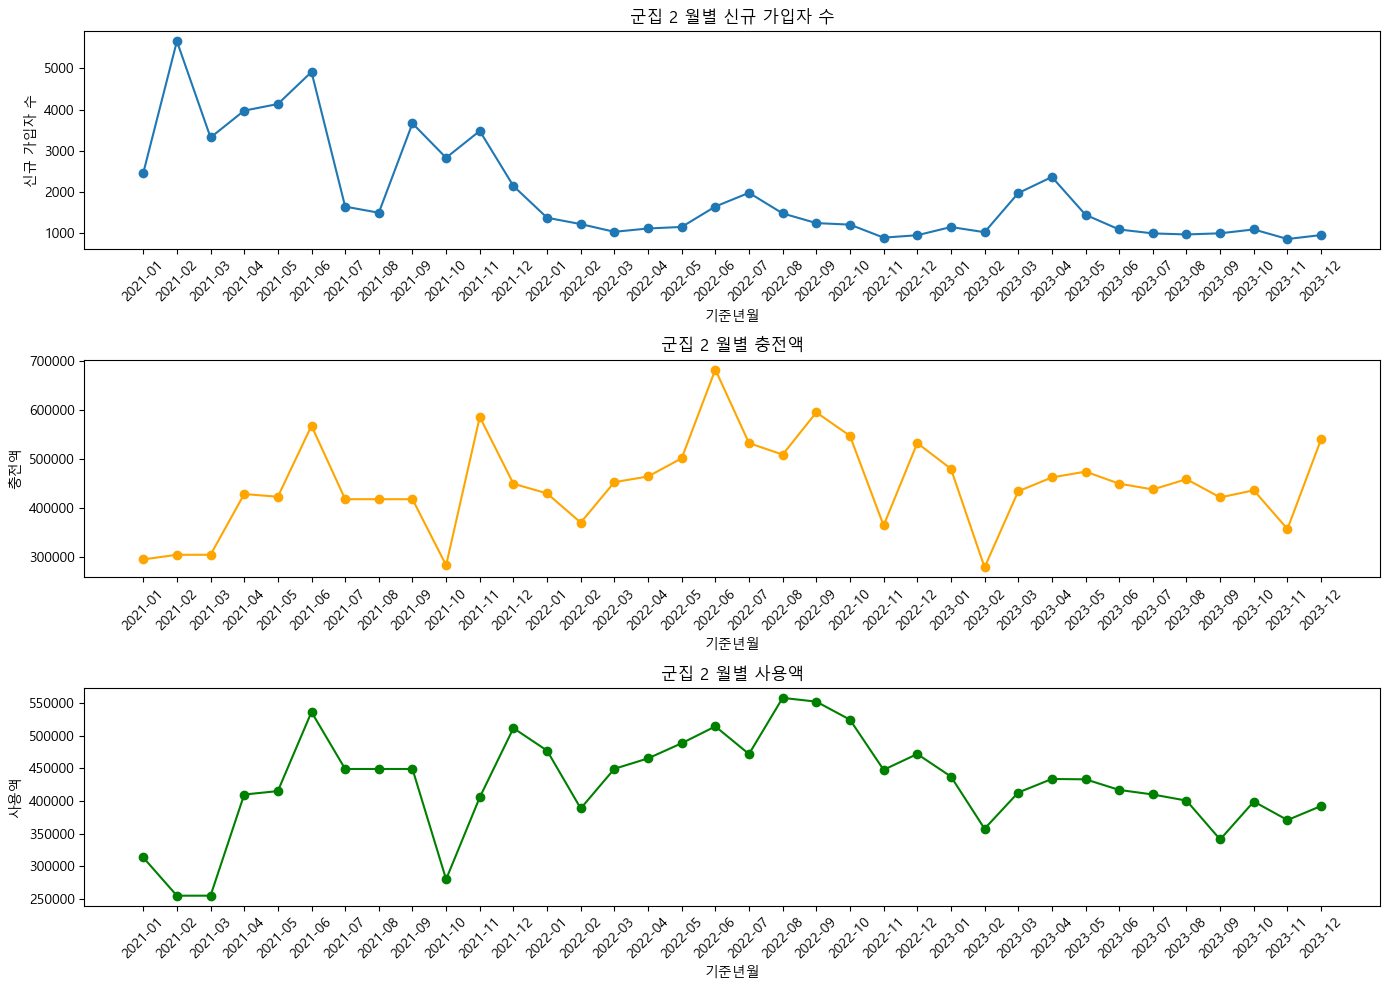

In [910]:
# 데이터 필터링: cluster 값에 따라 필터링
cluster_value = 2
df2_filtered = df2[df2['cluster'] == cluster_value]

# 월별 데이터의 평균값 계산
mean_values = df2_filtered.groupby('기준년월').agg({
    '월별신규가입자수(명)': 'mean',
    '월별충전액(만원)': 'mean',
    '월별사용액(만원)': 'mean'
}).reset_index()

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(mean_values['기준년월'], mean_values['월별신규가입자수(명)'], marker='o')
plt.title(f'군집 {cluster_value} 월별 신규 가입자 수') 
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(mean_values['기준년월'], mean_values['월별충전액(만원)'], marker='o', color='orange')
plt.title(f'군집 {cluster_value} 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(mean_values['기준년월'], mean_values['월별사용액(만원)'], marker='o', color='green')
plt.title(f'군집 {cluster_value} 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 레이아웃 조정
plt.tight_layout()
plt.show()

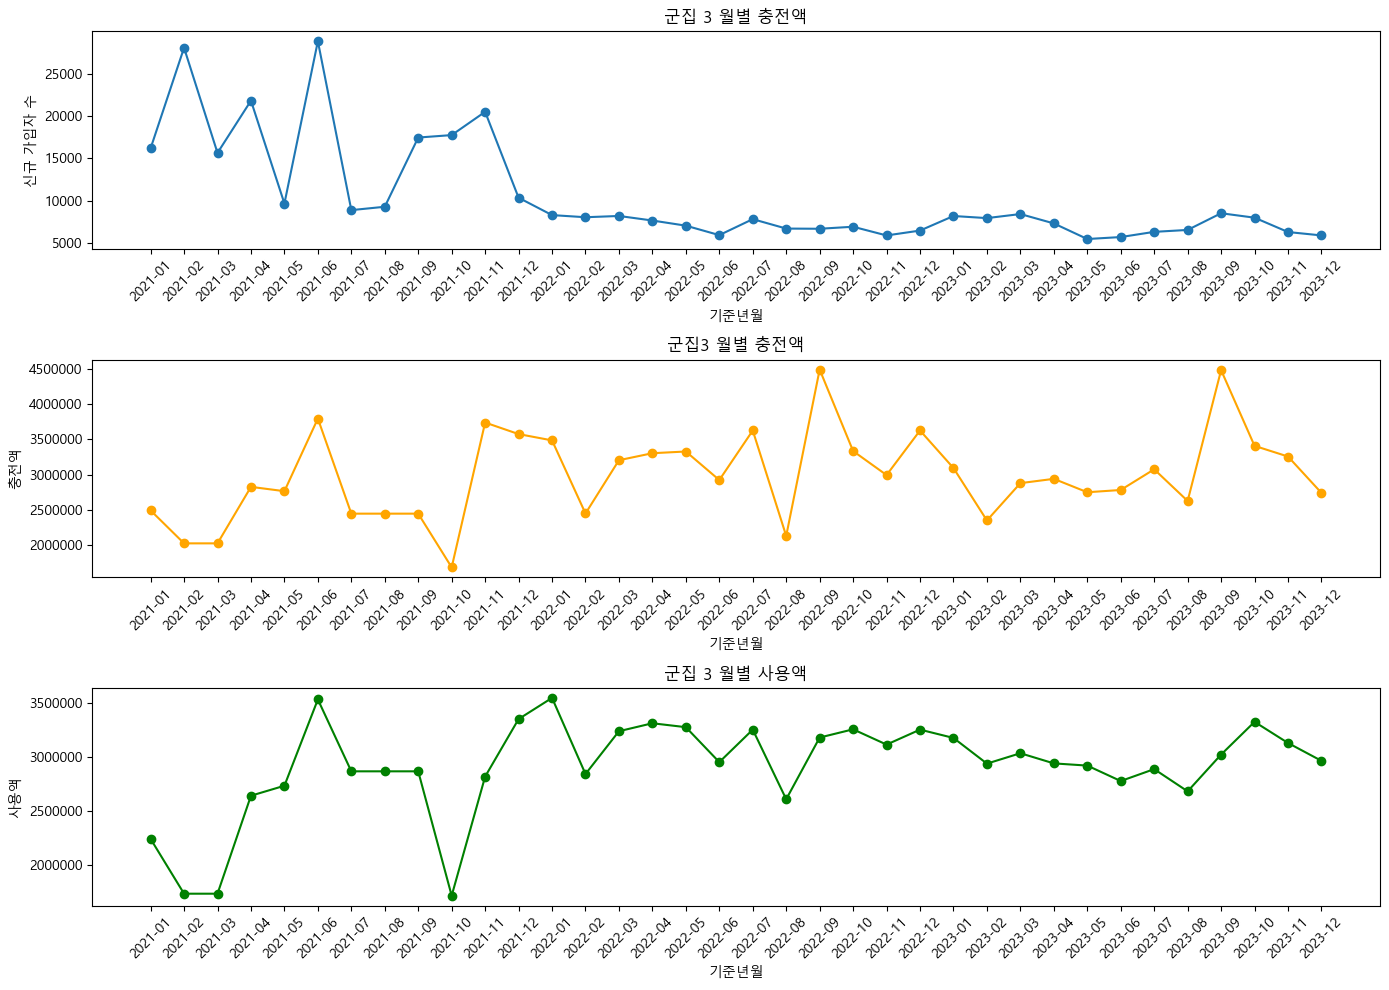

In [911]:
# 데이터 필터링: cluster 값에 따라 필터링
cluster_value = 3
df2_filtered = df2[df2['cluster'] == cluster_value]

# 월별 데이터의 평균값 계산
mean_values = df2_filtered.groupby('기준년월').agg({
    '월별신규가입자수(명)': 'mean',
    '월별충전액(만원)': 'mean',
    '월별사용액(만원)': 'mean'
}).reset_index()

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 월별 신규 가입자 수 시각화
plt.subplot(3, 1, 1)
plt.plot(mean_values['기준년월'], mean_values['월별신규가입자수(명)'], marker='o')
plt.title(f'군집 {cluster_value} 월별 충전액') 
plt.xlabel('기준년월')
plt.ylabel('신규 가입자 수')
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 충전액 시각화
plt.subplot(3, 1, 2)
plt.plot(mean_values['기준년월'], mean_values['월별충전액(만원)'], marker='o', color='orange')
plt.title(f'군집{cluster_value} 월별 충전액')
plt.xlabel('기준년월')
plt.ylabel('충전액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 월별 사용액 시각화
plt.subplot(3, 1, 3)
plt.plot(mean_values['기준년월'], mean_values['월별사용액(만원)'], marker='o', color='green')
plt.title(f'군집 {cluster_value} 월별 사용액')
plt.xlabel('기준년월')
plt.ylabel('사용액')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)  # x축 레이블 회전

# 레이아웃 조정
plt.tight_layout()
plt.show()

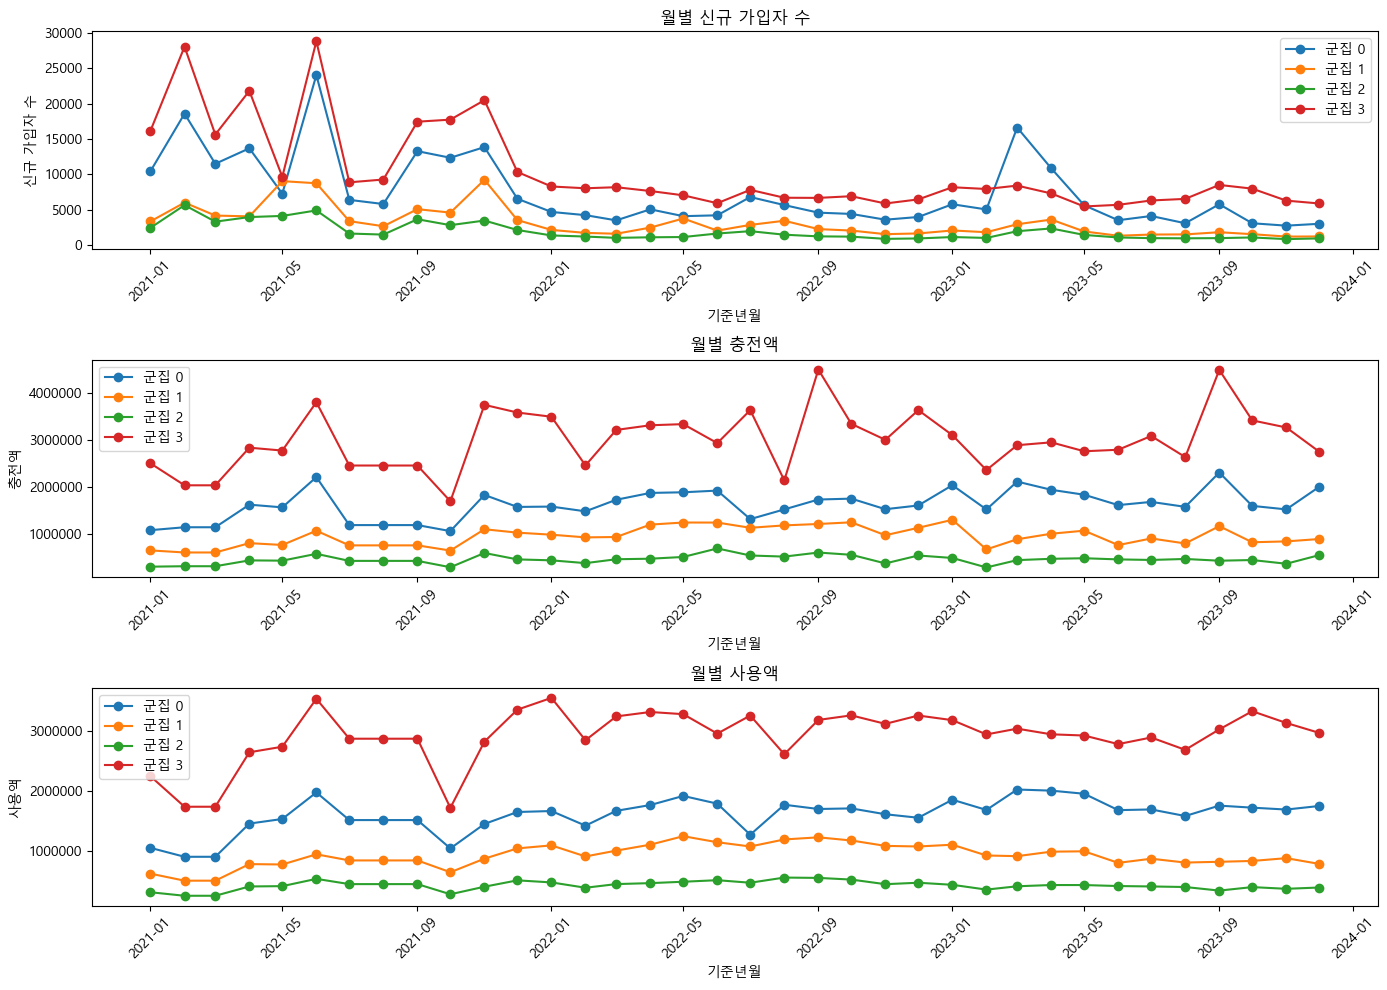

In [912]:
# 군집 리스트
cluster_values = [0, 1, 2, 3]

# 데이터 시각화
plt.figure(figsize=(14, 10))

# 각 군집에 대한 데이터 필터링 및 시각화
for cluster_value in cluster_values:
    df2_filtered = df2[df2['cluster'] == cluster_value]

    # 월별 데이터의 평균값 계산
    mean_values = df2_filtered.groupby('기준년월').agg({
        '월별신규가입자수(명)': 'mean',
        '월별충전액(만원)': 'mean',
        '월별사용액(만원)': 'mean'
    }).reset_index()

    # 기준년월을 datetime으로 변환 (형식이 'YYYY-MM'일 경우)
    mean_values['기준년월'] = pd.to_datetime(mean_values['기준년월'], format='%Y-%m')

    # 월별 신규 가입자 수 시각화
    plt.subplot(3, 1, 1)
    plt.plot(mean_values['기준년월'], mean_values['월별신규가입자수(명)'], marker='o', label=f'군집 {cluster_value}')
    plt.title('월별 신규 가입자 수')
    plt.xlabel('기준년월')
    plt.ylabel('신규 가입자 수')
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.legend()  # 범례 추가

    # 월별 충전액 시각화
    plt.subplot(3, 1, 2)
    plt.plot(mean_values['기준년월'], mean_values['월별충전액(만원)'], marker='o', label=f'군집 {cluster_value}')
    plt.title('월별 충전액')
    plt.xlabel('기준년월')
    plt.ylabel('충전액')
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    plt.gca().yaxis.get_major_formatter().set_scientific(False)
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.legend()  # 범례 추가

    # 월별 사용액 시각화
    plt.subplot(3, 1, 3)
    plt.plot(mean_values['기준년월'], mean_values['월별사용액(만원)'], marker='o', label=f'군집 {cluster_value}')
    plt.title('월별 사용액')
    plt.xlabel('기준년월')
    plt.ylabel('사용액')
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    plt.gca().yaxis.get_major_formatter().set_scientific(False)
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.legend()  # 범례 추가

# 레이아웃 조정
plt.tight_layout()
plt.show()

<hr>

<h3>[군집별 특징 - df3]</h3>

In [913]:
df3

,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리
0,고양시,까망노래연습장,노래방,8402,계속사업자,NaN,20240331,오락 및 여가시설
1,고양시,일산좋은치과의원,치과,4201,계속사업자,NaN,20240331,병원 및 의료기관
2,고양시,잉크존,"문구,사무용품",8102,계속사업자,NaN,20240331,소매업
3,고양시,참좋은집,오양.보육.복지시설,7301,계속사업자,NaN,20240331,기타 의료 및 복지시설
4,고양시,(주)팩토리빈,커피전문점,2502,계속사업자,NaN,20240331,카페 및 베이커리
...,...,...,...,...,...,...,...,...
418745,화성시,킹(KING),차량부품.용품,6501,계속사업자,NaN,20240331,차량 및 관련 서비스
418746,화성시,아리가또맘마 중동탄점,일식전문점,2303,계속사업자,NaN,20240331,음식점
418747,화성시,아이티씨영어,기타교육.교습.학원,7213,계속사업자,NaN,20240331,학원 및 교육서비스
418748,화성시,다함 목재,기타건축자재,3403,계속사업자,NaN,20240331,인테리어 및 건축자재


In [914]:
# df2에서 군집 별로 특징을 보기 위해 데이터 병합 (시군명 기준)
df4_cluster = df4[['시군명', 'cluster']]
df4_cluster = df4_cluster.drop_duplicates()
df4_cluster

,시군명,cluster
0,가평군,1
32,고양시,0
64,과천시,1
112,광명시,1
160,광주시,1
208,구리시,1
256,군포시,1
288,김포시,0
320,남양주시,0
352,동두천시,2


In [915]:
df3 = pd.merge(df3, df4_cluster, on='시군명', how='inner')
df3

,시군명,상호명,업종명,업종코드,휴폐업상태,폐업일자,데이터기준일자,업종명_카테고리,cluster
0,고양시,까망노래연습장,노래방,8402,계속사업자,NaN,20240331,오락 및 여가시설,0
1,고양시,일산좋은치과의원,치과,4201,계속사업자,NaN,20240331,병원 및 의료기관,0
2,고양시,잉크존,"문구,사무용품",8102,계속사업자,NaN,20240331,소매업,0
3,고양시,참좋은집,오양.보육.복지시설,7301,계속사업자,NaN,20240331,기타 의료 및 복지시설,0
4,고양시,(주)팩토리빈,커피전문점,2502,계속사업자,NaN,20240331,카페 및 베이커리,0
...,...,...,...,...,...,...,...,...,...
418745,하남시,구슬몬스터 하남점,일반음식점,2301,계속사업자,NaN,20240331,음식점,1
418746,하남시,키커스축구단,기타교육.교습.학원,7213,계속사업자,NaN,20240331,학원 및 교육서비스,1
418747,하남시,투다리 감일역점,일반음식점,2301,계속사업자,NaN,20240331,음식점,1
418748,하남시,리움아트,예체능계열학원,7205,계속사업자,NaN,20240331,학원 및 교육서비스,1


In [916]:
df3.to_csv('분석용_df3.csv',index=False)

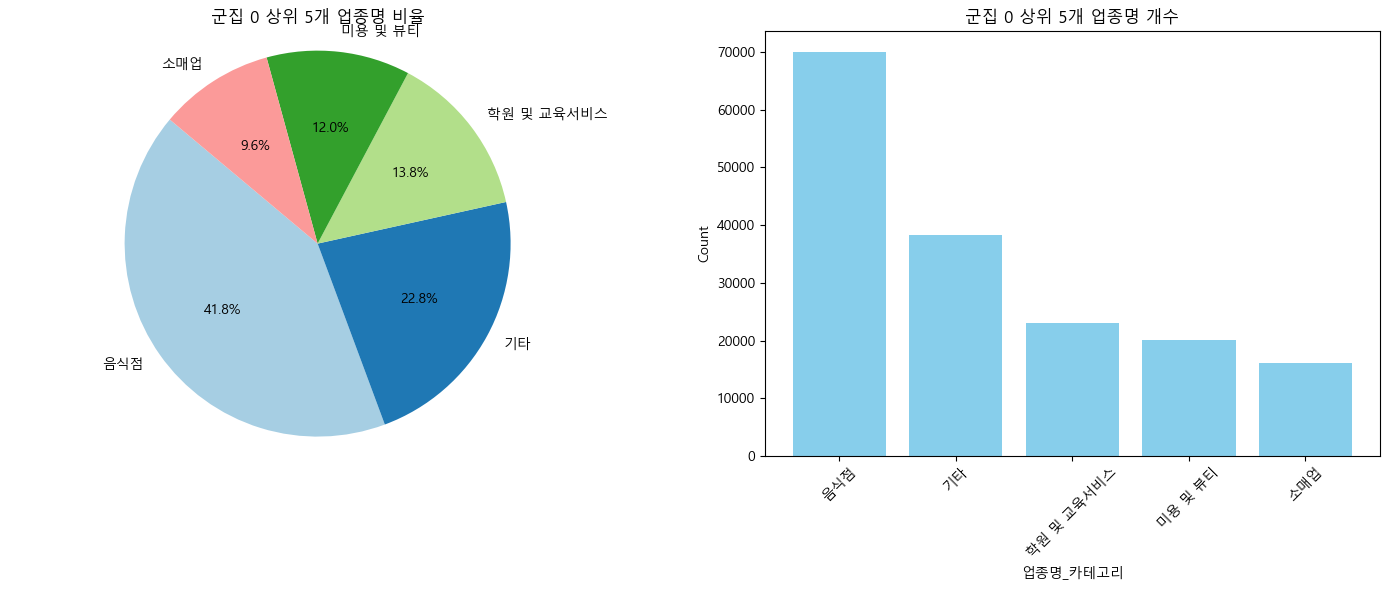

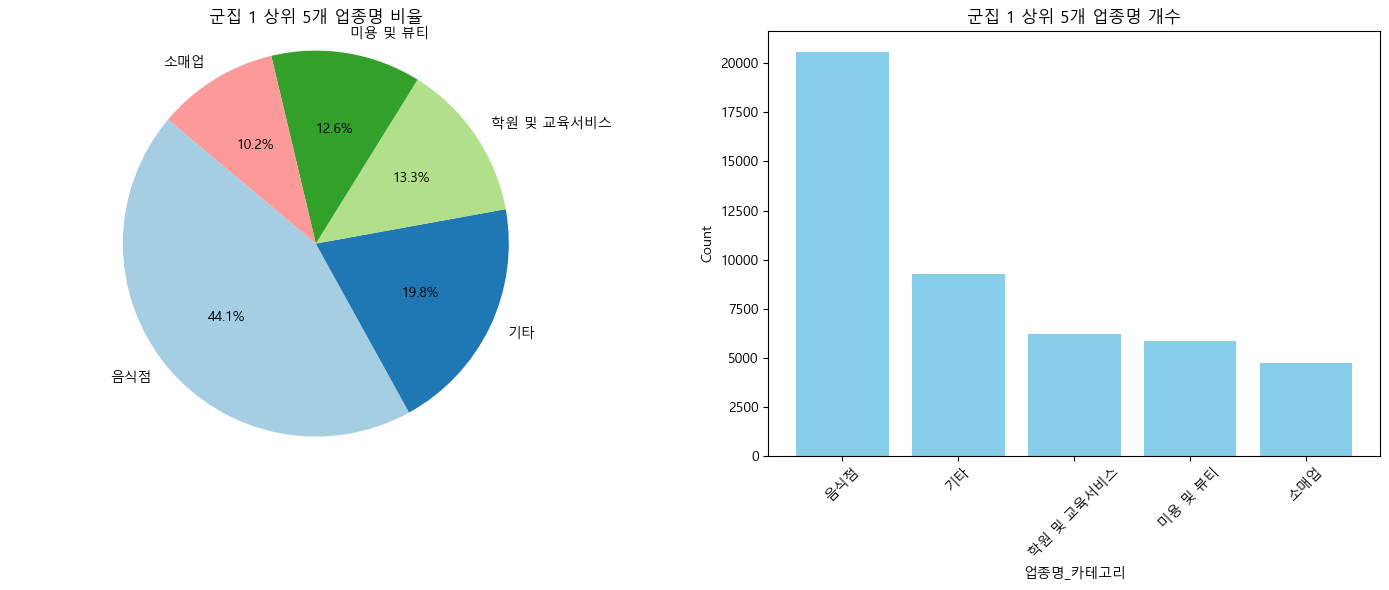

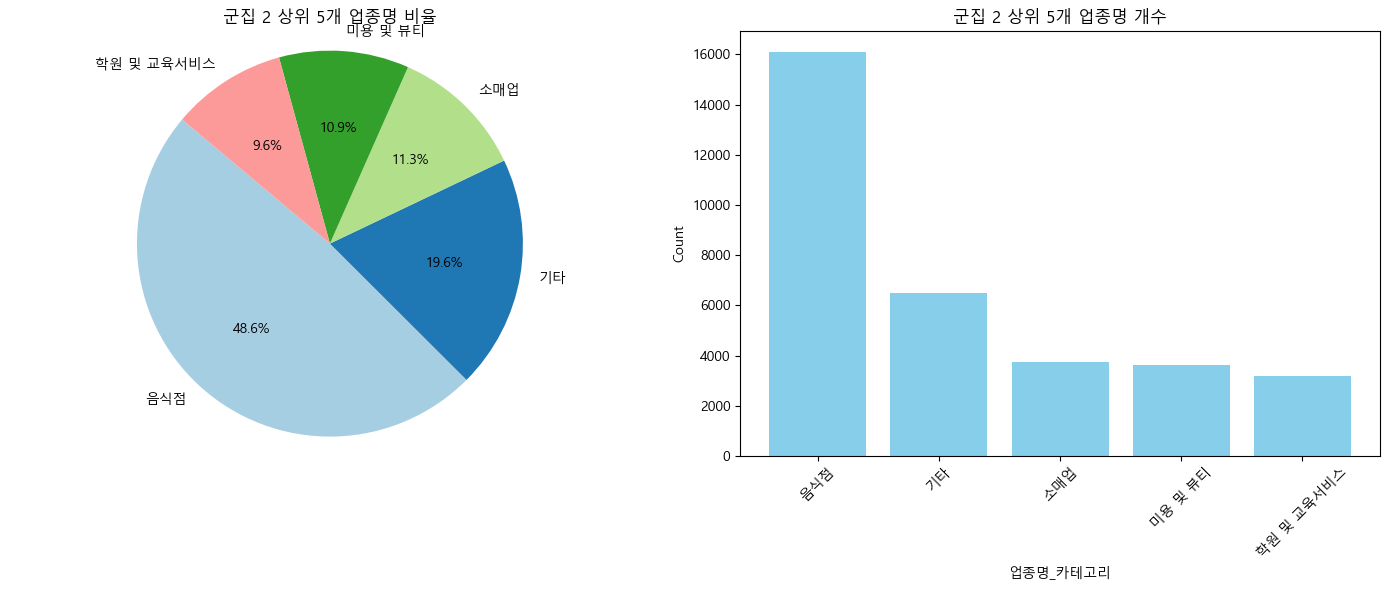

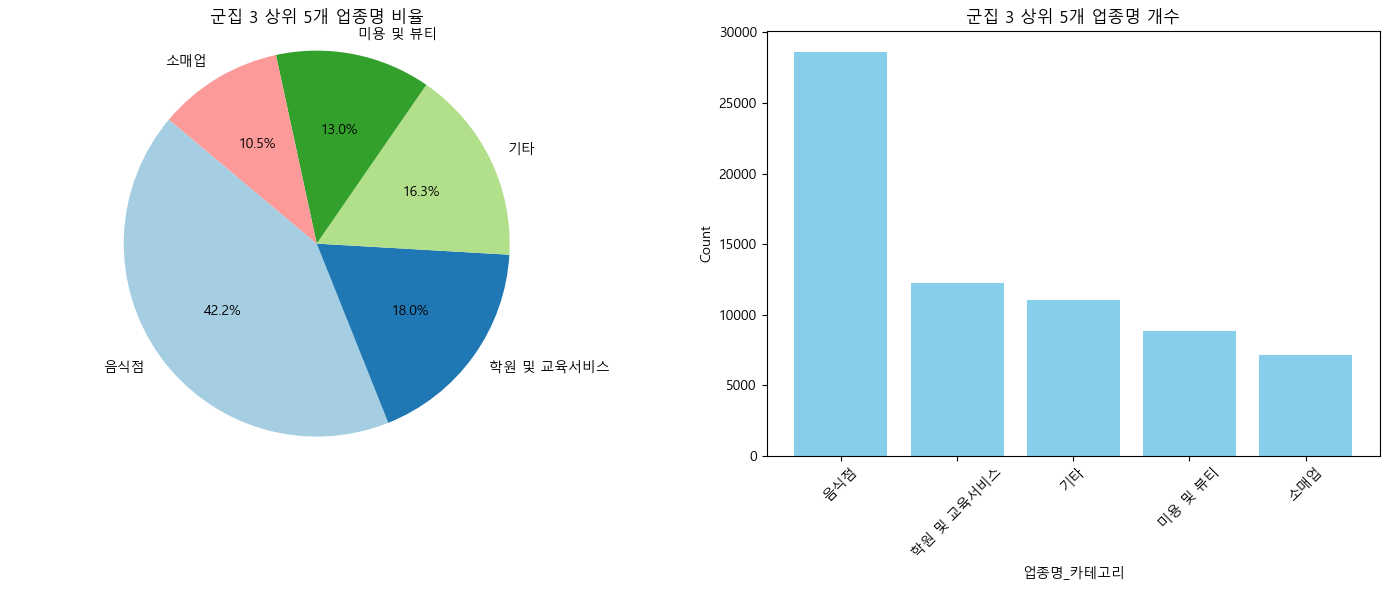

In [917]:
# 군집별로 상위 5개 업종명 비율과 개수를 계산하고 시각화하는 함수
def plot_top_5_industries_by_cluster(df):
    # 군집별로 상위 5개 업종명 비율과 개수 시각화
    clusters = df['cluster'].unique()
    
    for cluster_value in clusters:
        # 군집별 데이터 필터링
        df_cluster = df[df['cluster'] == cluster_value]
        
        # 업종명_카테고리별 개수 계산
        industry_count = df_cluster['업종명_카테고리'].value_counts()
        
        # 상위 5개 업종명 선택
        top_5_industry_count = industry_count.nlargest(5)
        
        # 서브플롯 설정: 1행 2열, 가로로 배치
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열, 화면 크기 조정
        
        # 원 그래프
        axes[0].pie(top_5_industry_count, labels=top_5_industry_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        axes[0].set_title(f'군집 {cluster_value} 상위 5개 업종명 비율')
        axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        
        # 막대 그래프
        axes[1].bar(top_5_industry_count.index, top_5_industry_count, color='skyblue')
        axes[1].set_xlabel('업종명_카테고리')
        axes[1].set_ylabel('Count')
        axes[1].set_title(f'군집 {cluster_value} 상위 5개 업종명 개수')
        axes[1].tick_params(axis='x', rotation=45)  # X축 레이블 회전

        plt.tight_layout()  # 플롯 간격 자동 조정
        plt.show()

# 시각화 
plot_top_5_industries_by_cluster(df3)

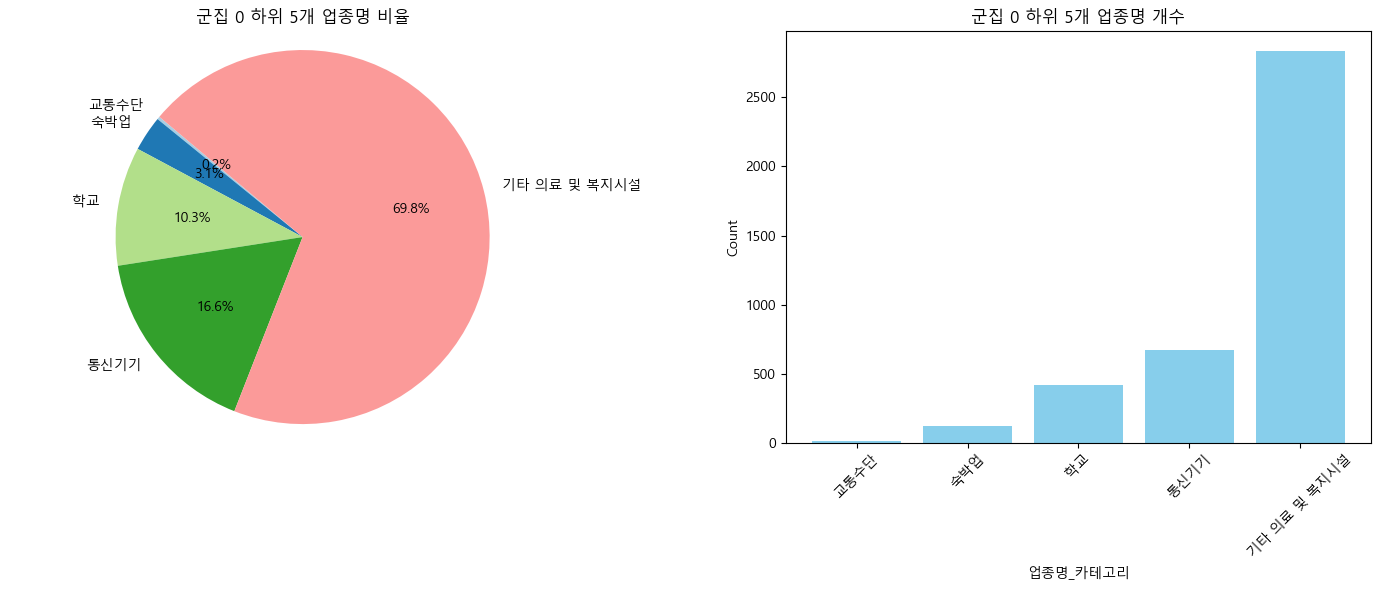

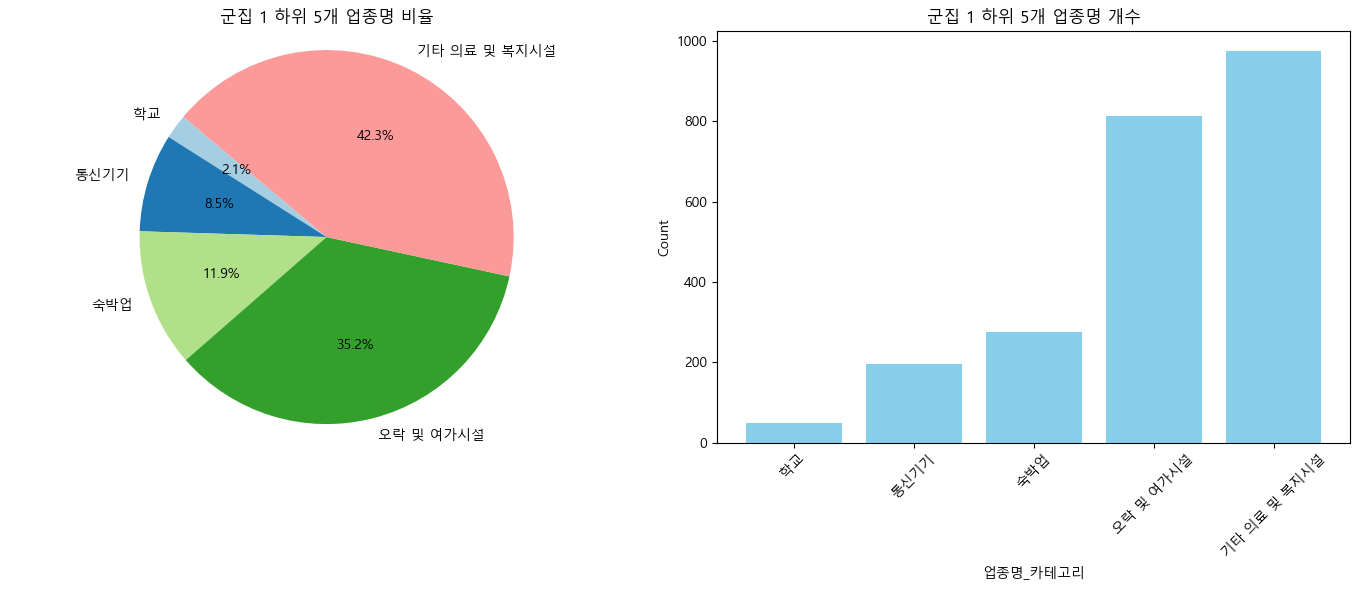

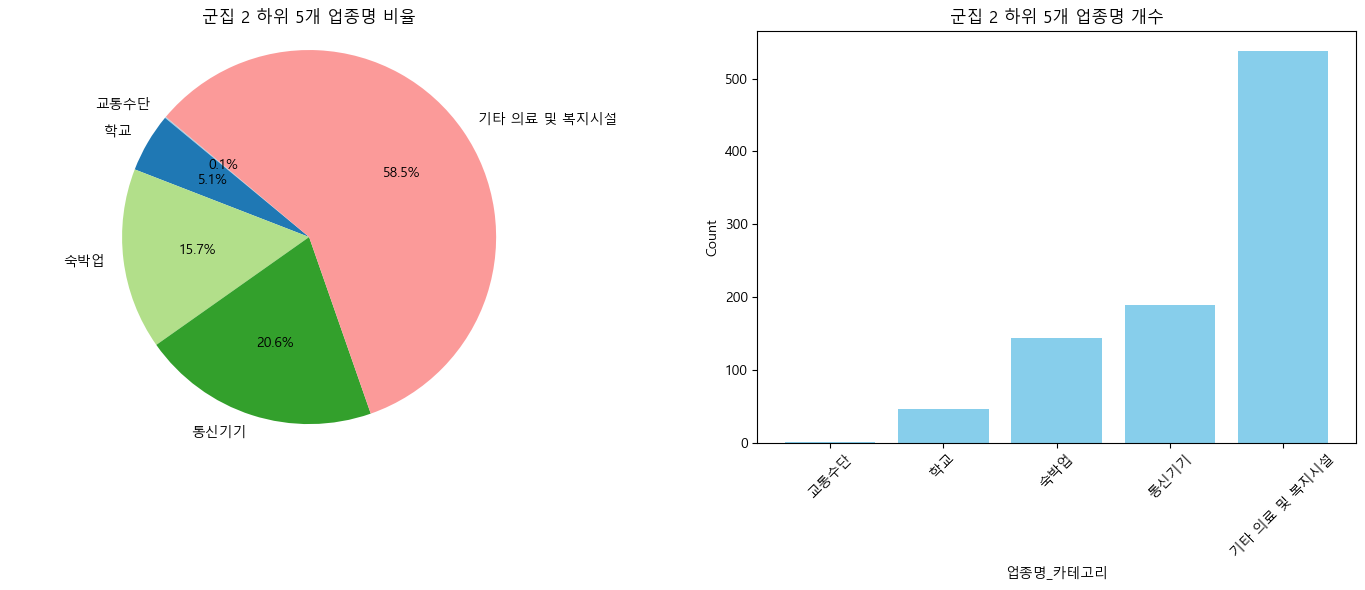

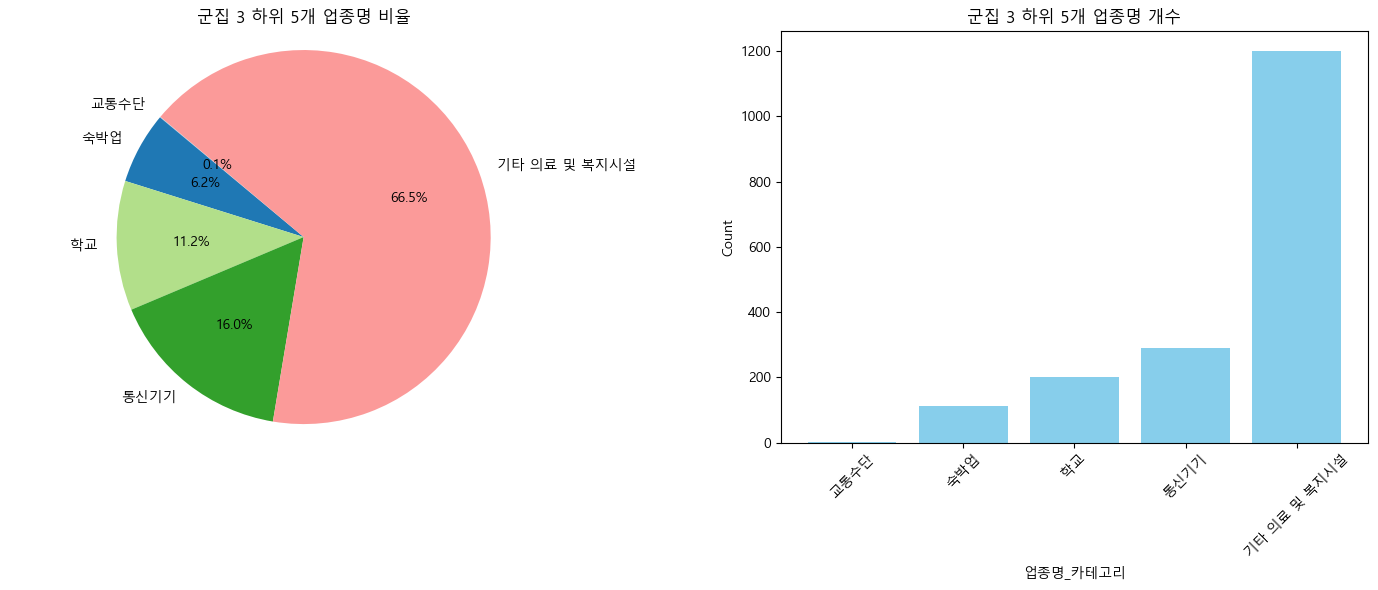

In [918]:
# 군집별로 하위 5개 업종명 비율과 개수를 계산하고 시각화하는 함수
def plot_bottom_5_industries_by_cluster(df):
    clusters = df['cluster'].unique()
    
    for cluster_value in clusters:
        # 군집별 데이터 필터링
        df_cluster = df[df['cluster'] == cluster_value]
        
        # 업종명_카테고리별 개수 계산
        industry_count = df_cluster['업종명_카테고리'].value_counts()
        
        # 하위 5개 업종명 선택
        bottom_5_industry_count = industry_count.nsmallest(5)
        
        # 서브플롯 설정: 1행 2열, 가로로 배치
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열, 화면 크기 조정
        
        # 하위 5개 업종명 비율 원 그래프
        axes[0].pie(bottom_5_industry_count, labels=bottom_5_industry_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        axes[0].set_title(f'군집 {cluster_value} 하위 5개 업종명 비율')
        axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        
        # 하위 5개 업종명 개수 막대 그래프
        axes[1].bar(bottom_5_industry_count.index, bottom_5_industry_count, color='skyblue')
        axes[1].set_xlabel('업종명_카테고리')
        axes[1].set_ylabel('Count')
        axes[1].set_title(f'군집 {cluster_value} 하위 5개 업종명 개수')
        axes[1].tick_params(axis='x', rotation=45)  # X축 레이블 회전

        plt.tight_layout()  # 플롯 간격 자동 조정
        plt.show()

# 시각화 
plot_bottom_5_industries_by_cluster(df3)